In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, minmax_scale

In [2]:
plt.rcParams['figure.figsize'] = (30,8)

## 파생변수 함수

In [9]:
def cal_LMR(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['len'].groupby(temp['dstIp']).mean()
    return new[v.dstIp]

In [10]:
def cal_LCR(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['len'].groupby(temp['dstIp']).count()
    return new[v.dstIp]

In [98]:
np.mean([]) + 0

c:\python\venv\data_science\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\python\venv\data_science\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [134]:
def cal_MAX(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).max()
    return new[v.dstIp]

#     temp = data[data.index < v.name]
#     temp = temp[temp.srcIp == v.srcIp]
#     return temp.iloc[-50:,:].cnt.max()

In [77]:
def cal_MEAN(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).mean()
    return new[v.dstIp]

In [218]:
def cal_C(v, data):
    temp = data[data.index < v.name]
    temp = temp[temp.dstIp == v.dstIp]
    return np.around(temp.iloc[-40:,:].len.sum()/(temp.iloc[-40:,:].len.count() + 0.00000001),0)
    

In [29]:
def cal_V(v, data):
    temp = data[data.index < v.name]
    temp = temp[temp.srcIp == v.srcIp]
    return np.var(temp.iloc[-10:,:].cnt)

In [3]:
raw_data = pd.read_excel('./data/export3.xlsx')

In [47]:
#raw_data_1 = pd.read_excel('./data/export1.xlsx')

In [48]:
#raw_data_2 = pd.read_excel('./data/export2.xlsx')

In [123]:
# raw_data_2['label'] = 0
# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 21:45:00') & (raw_data_2['timestamp'] < '2018-10-12 21:46:00'), 'label'] = 1

# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 21:50:00') & (raw_data_2['timestamp'] < '2018-10-12 21:51:00'), 'label'] = 1

# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 21:55:00') & (raw_data_2['timestamp'] < '2018-10-12 21:56:00'), 'label'] = 1

# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 22:01:00') & (raw_data_2['timestamp'] < '2018-10-12 22:06:00'), 'label'] = 2

# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 22:11:00') & (raw_data_2['timestamp'] < '2018-10-12 22:17:00'), 'label'] = 2

# raw_data_2.loc[(raw_data_2['timestamp'] >= '2018-10-12 22:23:00') & (raw_data_2['timestamp'] < '2018-10-12 22:28:00'), 'label'] = 2

## EDA

In [8]:
raw_data['label'] = 0
#cctv
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 15:55:00') & (raw_data['timestamp'] < '2018-10-14 15:56:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:05:00') & (raw_data['timestamp'] < '2018-10-14 16:06:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:15:00') & (raw_data['timestamp'] < '2018-10-14 16:16:30'), 'label'] = 1

#etc
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:25:00') & (raw_data['timestamp'] < '2018-10-14 16:30:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:40:00') & (raw_data['timestamp'] < '2018-10-14 16:45:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:55:00') & (raw_data['timestamp'] < '2018-10-14 17:00:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 17:10:00') & (raw_data['timestamp'] < '2018-10-14 17:15:00'), 'label'] = 2

In [13]:
data = raw_data

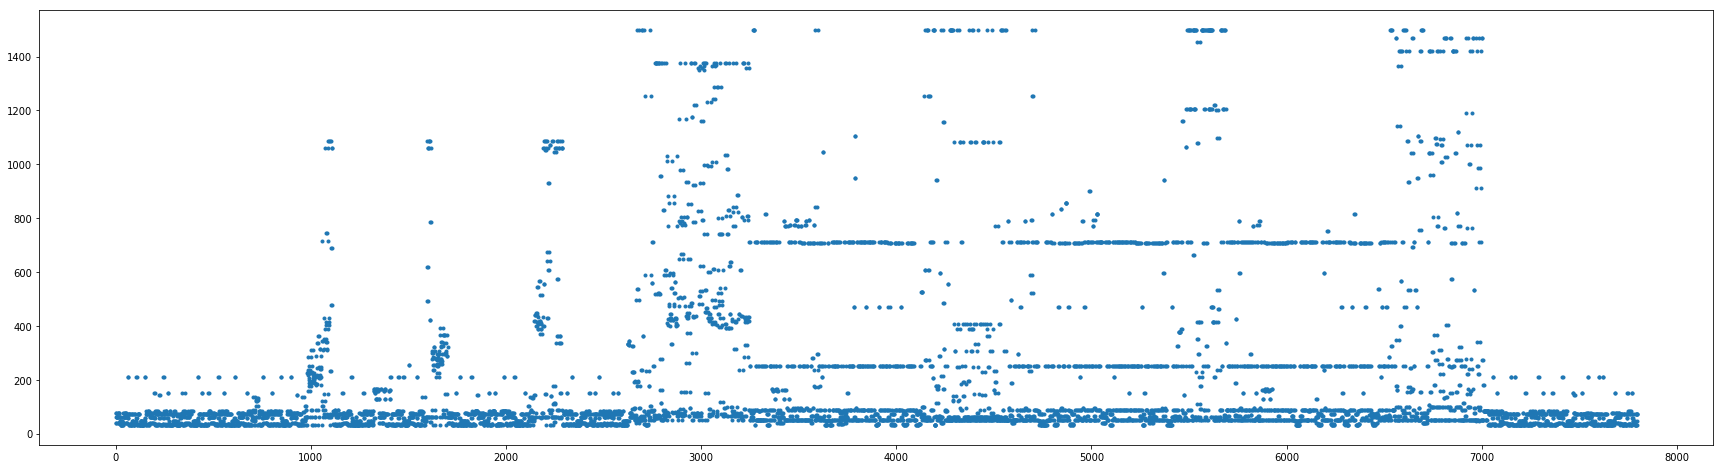

In [15]:
data.len.plot(style='.')

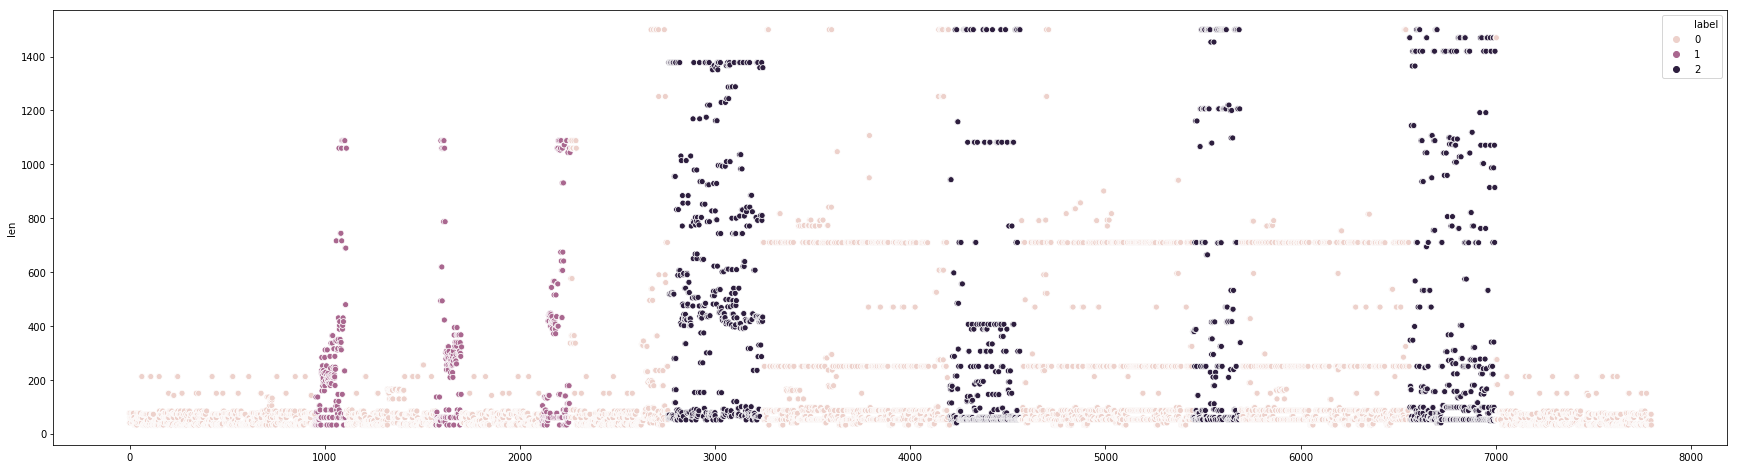

In [14]:
sns.scatterplot(x=range(len(data)), y=data.len, hue=data.label)

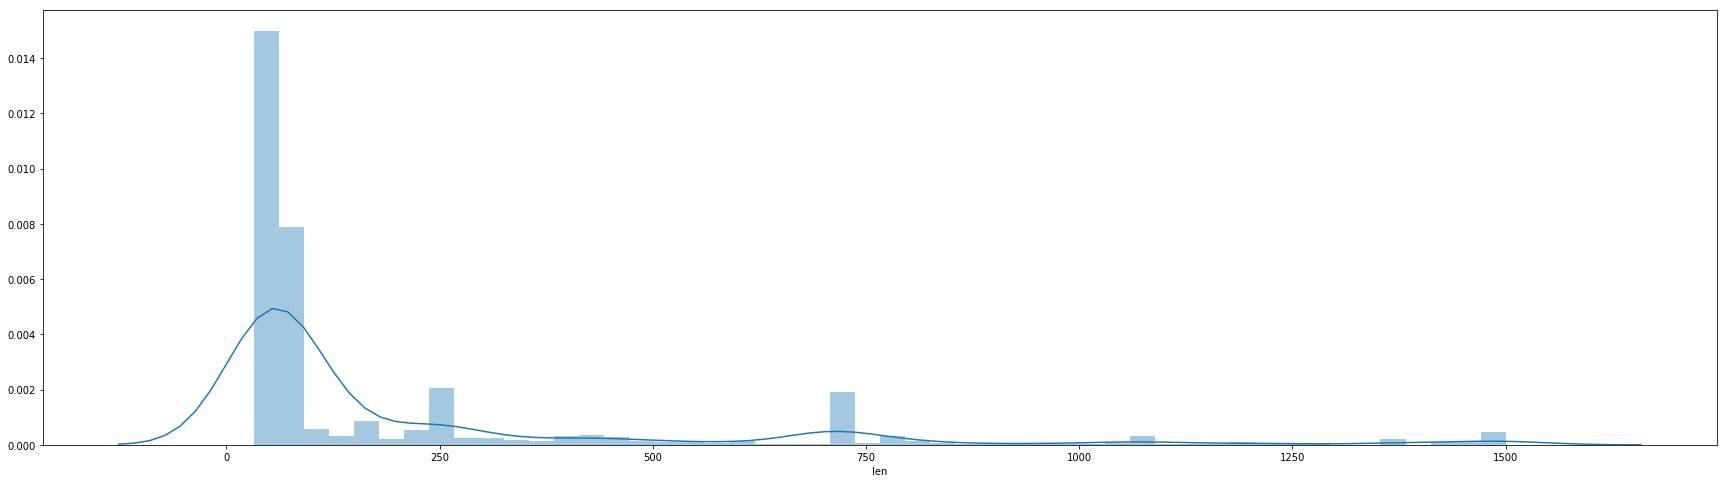

In [16]:
sns.distplot(data.len)

## FE

In [20]:
data.head(2)

,dstIp,srcPort,dstPort,srcIp,proto,ipLenCount,len,cnt,ipLenMean,timestamp,label
0,10.0.0.95,53,34750,10.0.0.1,17,0,76,1,0.0,2018-10-14 15:32:55,0
1,10.0.0.95,808,43554,45.33.49.203,6,0,40,1,0.0,2018-10-14 15:32:55,0


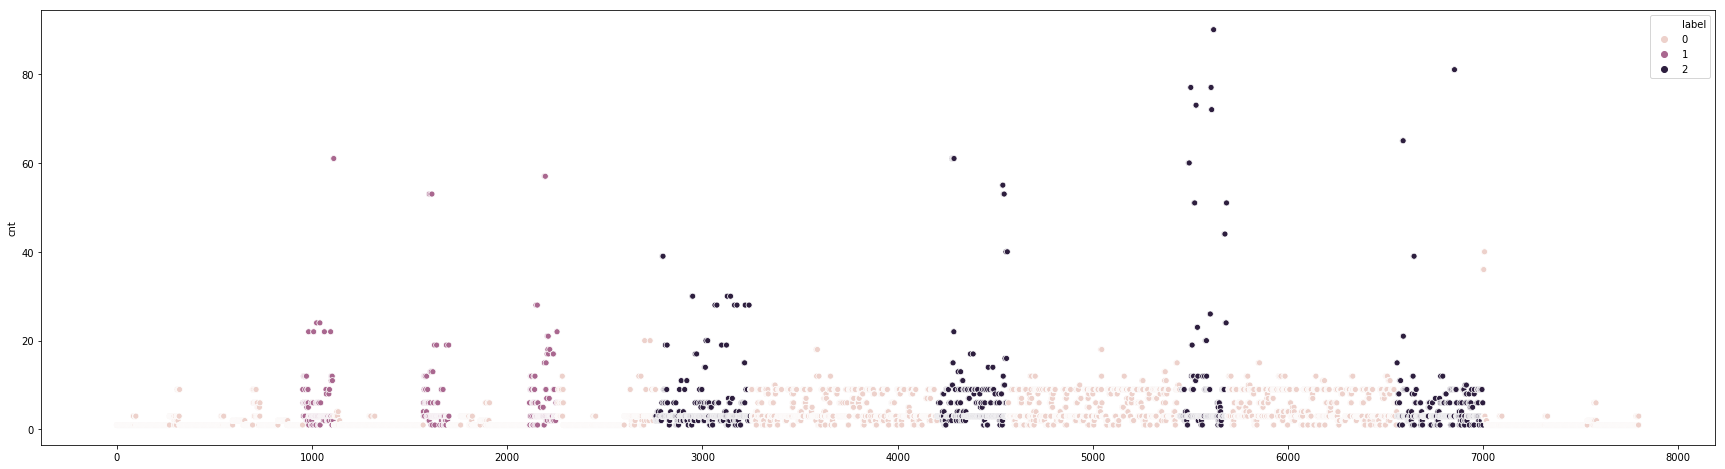

In [28]:
sns.scatterplot(x=range(len(data)), y=data.cnt, hue=data.label)

### cnt

In [30]:
#분산
data['cnt_val'] = data.apply(lambda v: cal_V(v, data), axis = 1)

In [107]:
data = data.fillna(0)

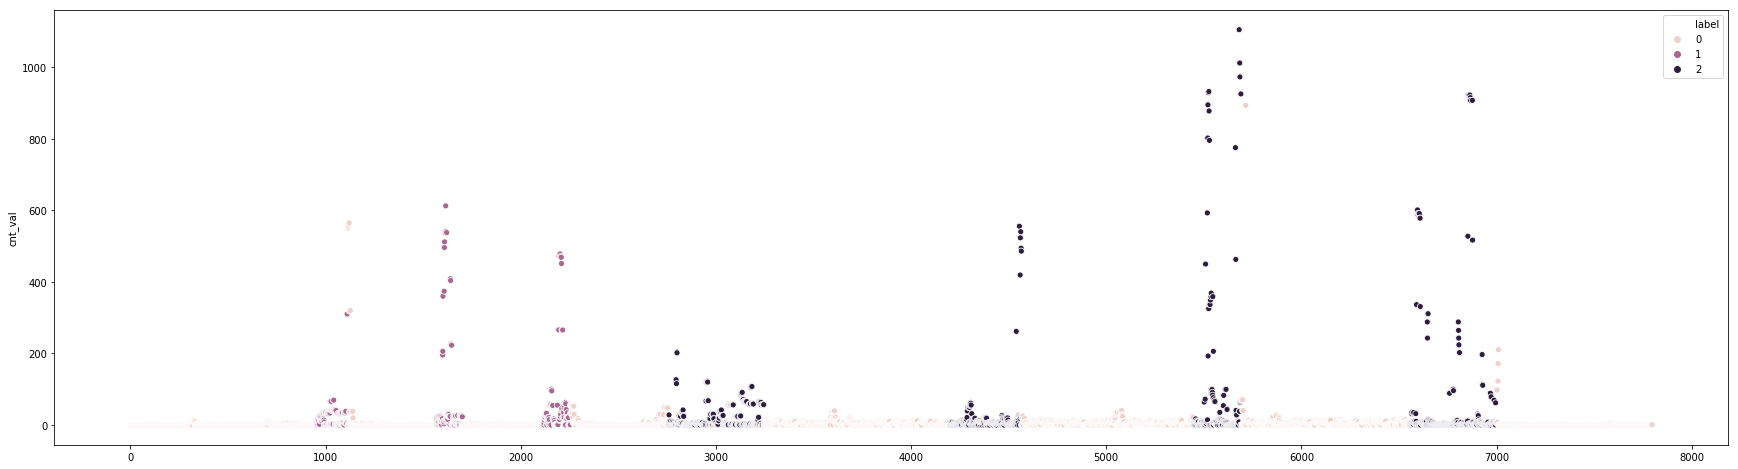

In [44]:
sns.scatterplot(x=range(len(data)), y=data.cnt_val, hue=data.label)

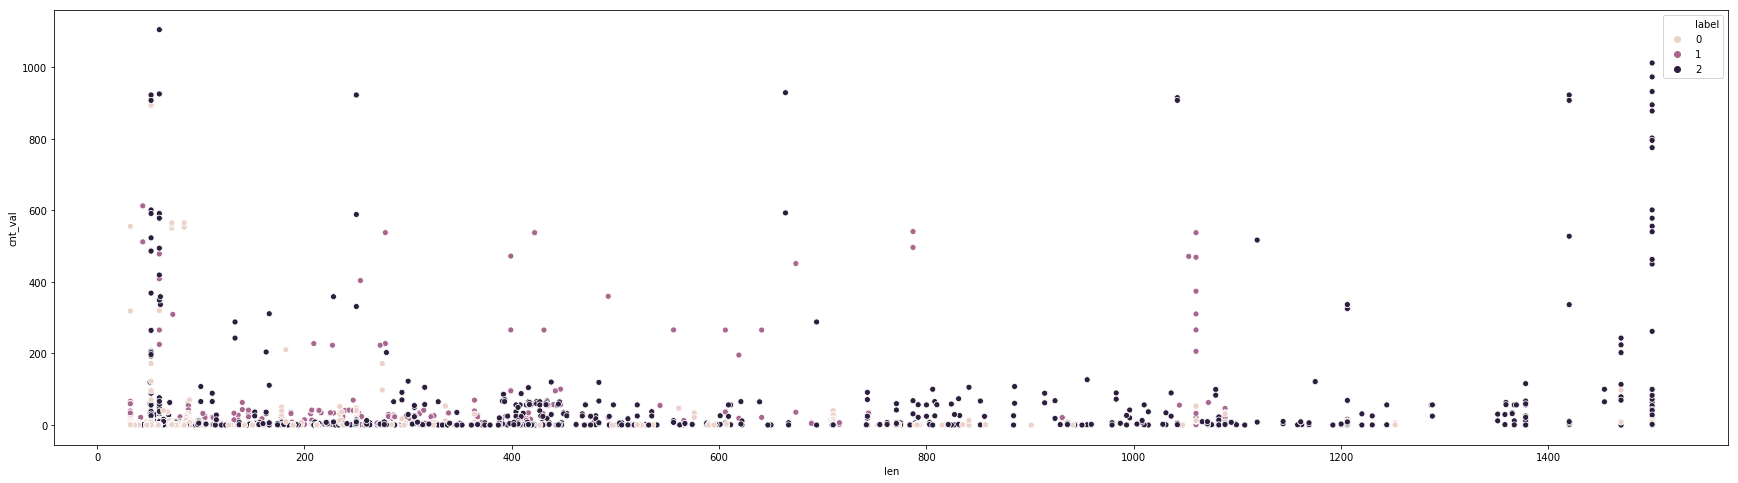

In [64]:
sns.scatterplot(x=data.len, y=data.cnt_val, hue=data.label)

In [56]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [135]:
#max
data['cnt_max'] = data.apply(lambda v: cal_MAX(v, data), axis = 1)

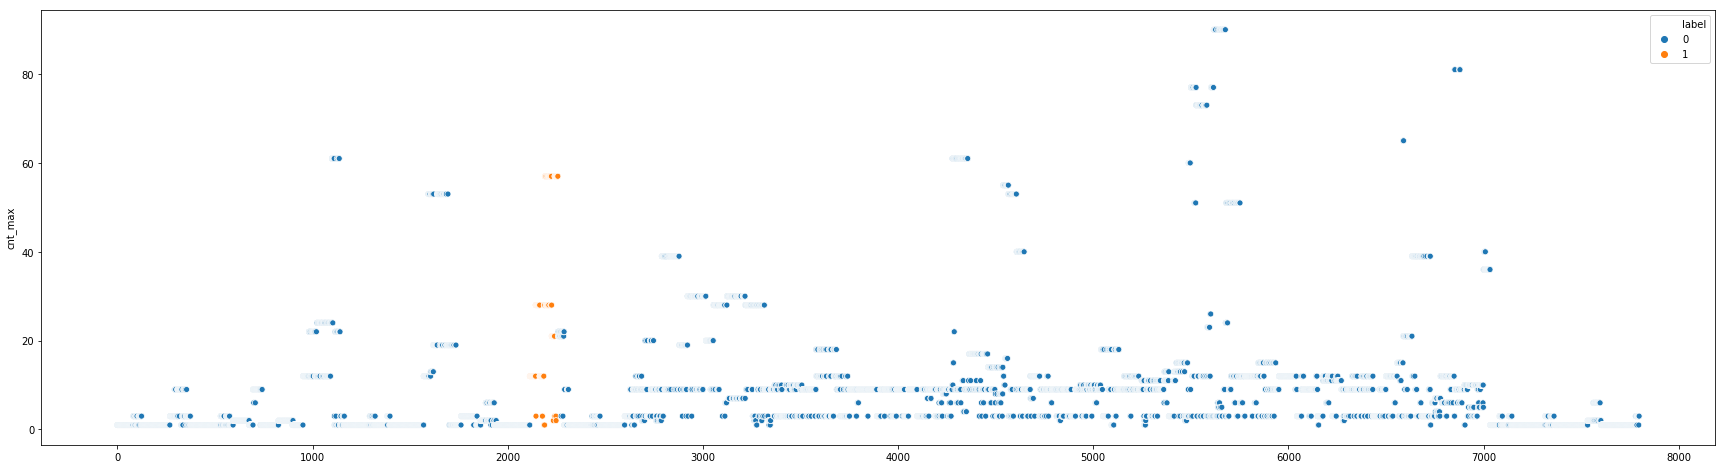

In [136]:
sns.scatterplot(x=range(len(data)), y=data.cnt_max, hue=data.label)

In [86]:
#평균
data['cnt_mean'] = data.apply(lambda v: cal_MEAN(v, data), axis = 1)

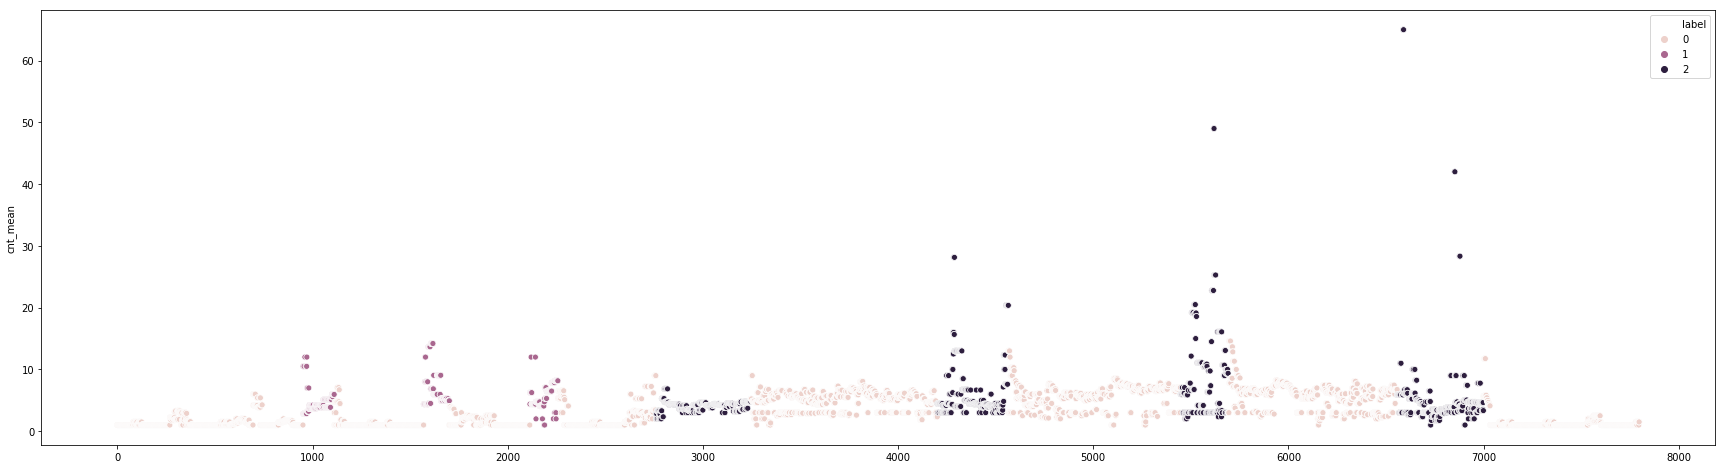

In [87]:
sns.scatterplot(x=range(len(data)), y=data.cnt_mean, hue=data.label)

In [138]:
#max / mean
data['cnt_max_devide_mean'] = data['cnt_max'] / (data['cnt_mean'] + 0.00000001)

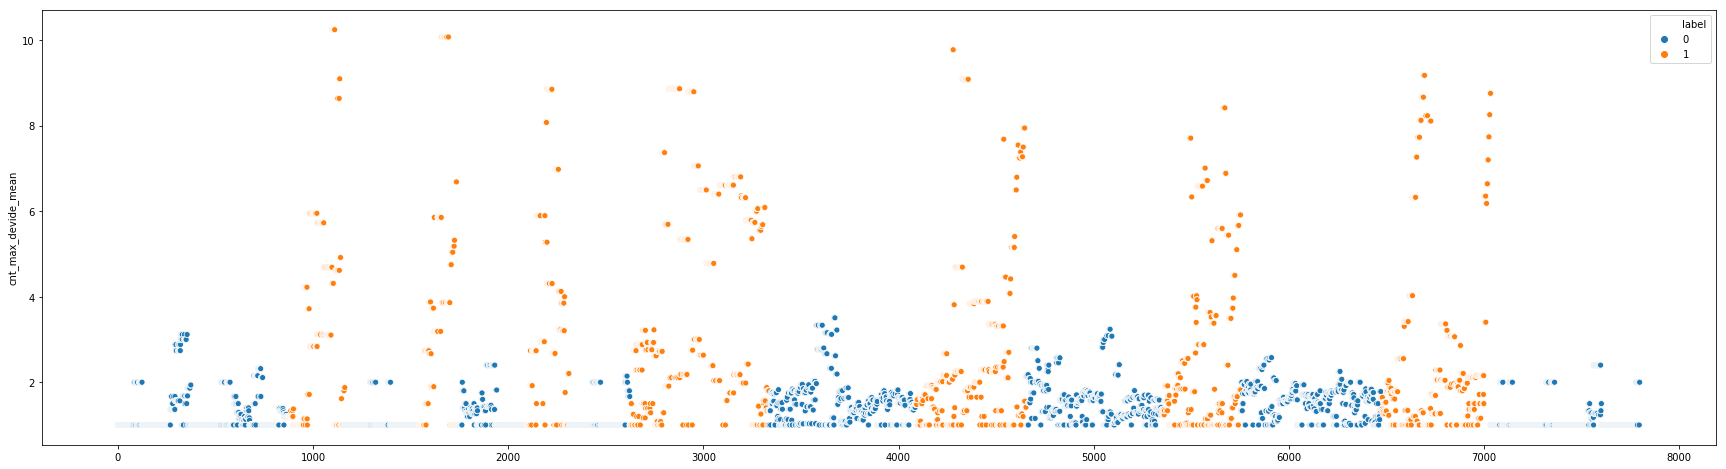

In [151]:
sns.scatterplot(x=range(len(data)), y=data.cnt_max_devide_mean, hue=data.label)

In [329]:
data.label = 0
data.loc[(data['timestamp'] >= '2018-10-14 15:54:00') & (data['timestamp'] <= '2018-10-14 15:57:30'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:04:00') & (data['timestamp'] <= '2018-10-14 16:07:30'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:14:00') & (data['timestamp'] <= '2018-10-14 16:17:30'), 'label'] = 1

data.loc[(data['timestamp'] >= '2018-10-14 16:24:00') & (data['timestamp'] <= '2018-10-14 16:31:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:39:00') & (data['timestamp'] <= '2018-10-14 16:46:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:54:00') & (data['timestamp'] <= '2018-10-14 17:01:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 17:09:00') & (data['timestamp'] <= '2018-10-14 17:16:00'), 'label'] = 1

In [331]:
b = data[data.label >= 1]

In [332]:
b = b[data.cnt_max_devide_mean >= 4]

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [333]:
c = data[data.label == 0]

In [334]:
d = pd.merge(b,c, how='outer')

In [335]:
d.cnt_max_devide_mean = minmax_scale(d.cnt_max_devide_mean)
d.cnt_max = minmax_scale(d.cnt_max)

c:\python\venv\data_science\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


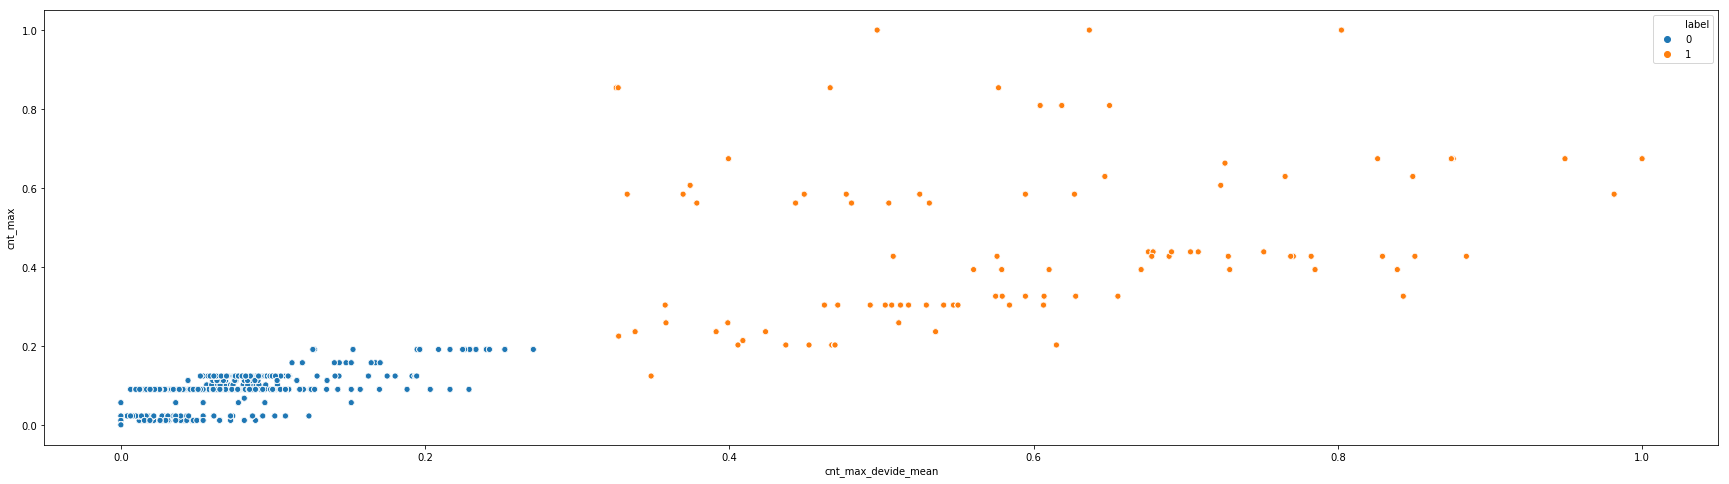

In [336]:
sns.scatterplot(x=d.cnt_max_devide_mean, y=d.cnt_max, hue=d.label)

In [328]:
X = data.loc[:,['cnt_max_devide_mean', 'cnt_max']]

In [274]:
X.cnt_max_devide_mean = minmax_scale(X.cnt_max_devide_mean)
X.cnt_max = minmax_scale(X.cnt_max)

c:\python\venv\data_science\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [275]:
model1 = KMeans(n_clusters=2, algorithm='auto').fit(X)

In [276]:
def plot_cluster(model, c0, c1):
    plt.scatter(X.values[model.labels_ == 0, 0], X.values[model.labels_ == 0, 1], s=100, marker='.', c='r')
    plt.scatter(X.values[model.labels_ == 1, 0], X.values[model.labels_ == 1, 1], s=100, marker='.', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

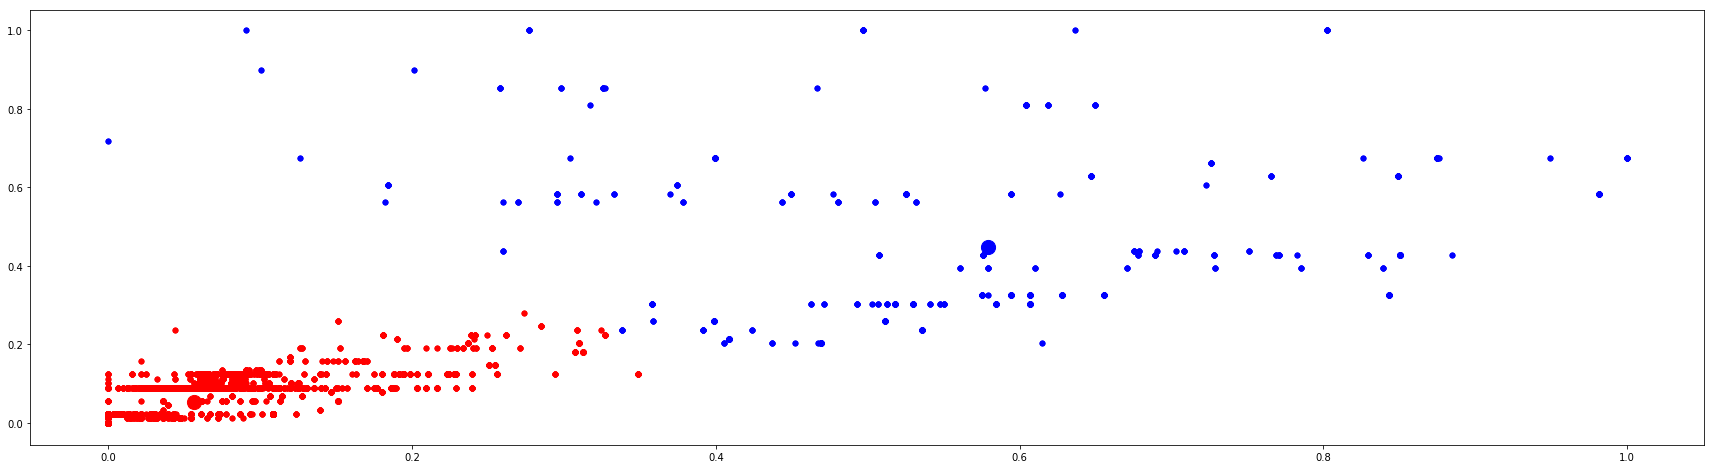

In [277]:
c0, c1 = model1.cluster_centers_
plot_cluster(model1, c0, c1)

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABrIAAAHVCAYAAAC9uWt9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3W+MHHd6J/bnR5FNA+afneHKGa7N0fpOshAtGVC5Pq1NLmlb4yBa4rD7InuBtTgbSc63wF6cAJdLcD6AMwmkMeK7e5FcYq+NvcPh4DW0hu0XWQEn0cGRNnZFxtIOQeZE0lAkOCF3s9O2MkNLMw6ybe3+8qLE4/zpmema6e6q7v58gEGxnq6uerqqev70l1W/lHMOAAAAAAAAqJt9VTcAAAAAAAAAnQiyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAt7a9qwx/96Efzxz/+8ao2DwAAAAAAQEWuX7/+/+ScH91pucqCrI9//OOxsLBQ1eYBAAAAAACoSErpbjfLubUgAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALe0YZKWU/kVK6c9SSre2eDyllP6nlNI7KaV/k1L693vfJtCNdjtibi5iZqaYtttVdwSMouXliOnpiAMHiunyctUdAdTbvXsRBw9GpFRM792ruiMYXv7mgfHRakUcPRqxb18xbbWq7giAqqSc8/YLpHQ+IlYj4jdzzic7PH4hIv6LiLgQEZ+MiH+ac/7kThtuNpt5YWFhV00Dm7XbEVNTEffvP6xNTBS/6DUa1fUFjJbl5YhjxzbXl5YiJicH3w9A3d27F/HYY5vrd+8W/xkA6J6/eWB8tFoRx49vri8uFt8HABgNKaXrOefmTsvteEVWzvnrEbHd/7X+bBQhV845/1FEfCSl1OFHDdBP8/Pr/6CLKObn56vpBxhNp0+XqwOMuyeeKFcHtuZvHhgfTz5Zrg7AaOvFGFk/HBHfWjP/7Q9rm6SUvpBSWkgpLbz77rs92DTwwNWrnevXrg22D2C0LS6WqwOMu61ue+Z2aFCev3lgfKyslKsDMNp6EWSlDrWO9yvMOX8559zMOTcfffTRHmwaeODs2c71M2cG2wcw2jrd3mO7OsC42+p2Z26DBuX5mwfGx+HD5eoAjLZeBFnfjogTa+Z/JCK+04P1AiVcvFjcH36tiYmiDtArN2+WqwOMu7ffLlcHtuZvHhgfb71Vrg7AaOtFkPVyRPx8Kvx4RLyXc3aDIRiwRqMYDHV2NmJmppga9BjotcnJiKWliBMnIvbvL6ZLS0UdgM2mpyPu3n34O1mjUcxPT1fbFwwjf/PA+JiaKm5ffuRIRErFdHGxqAMwflLOHe8C+HCBlL4aET8VER+NiD+NiP82Ig5EROScfyOllCLiVyPiuYj4fyPiP805L+y04WazmRcWdlwMAAAAAACAEZNSup5zbu603P6dFsg5P7/D4zki/vMSvQEAAAAAAMCOenFrQQAAAAAAAOg5QRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFREREux0xNxcxM1NM2+2qO2LUOMcAAAAAgLJSzrmSDTebzbywsFDJtoH12u2IqamI+/cf1iYmIlqtiEajur4YHc4xAAAAAGCtlNL1nHNzp+VckQXE/Pz6gCGimJ+fr6YfRo9zDAAAAADYDUEWEFevdq5fuzbYPhhdzjEAAAAAYDcEWUCcPdu5fubMYPtgdDnHAAAAAIDdMEYWYPwi+s45BgAAAACsZYwsoGuNRhEozM5GzMwUUwEDveQcAwAAAAB2wxVZAAAAAAAADJQrsgAAAAAAABhqgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAQ2x5OWJ6OuLAgWK6vFx1R/23uhpx/nzExEQxXV2tuqPOHhybRx6JOHq06HVuLqLdrrozGF7tdvE+mpnxfqJ+nJ8AANAfKedcyYabzWZeWFioZNsAMAqWlyOOHdtcX1qKmJwcfD+DsLoacfjw5vrKSsShQ4PvZytbHZuIIoBrtSIajcH2BMOu3Y6Ymoq4f/9hzfuJunB+AgBAeSml6znn5k7LuSILAIbU6dPl6qPgwoVy9apsdwzu34+Ynx9cLzAq5ufXhwQR3k/Uh/MTAAD6R5AFAENqcbFcfRS8+Wbn+q1bg+1jJzsdg2vXBtMHjJKrVzvXvZ+oA+cnAAD0jyALAIbU8ePl6qPg1KnO9ZMnB9vHTnY6BmfODKYPGCVnz3auez9RB85PAADoH2NkAcCQMkbWQ8bIgtFnDCLqzPkJAADlGSMLAEbc5GQRWp04EbF/fzEd5RArogirVlYizp0rPiA8d65+IVbE+mOzb1/EkSMR589HzM76UBN2q9Eo3j+zsxEzM95P1IvzEwAA+scVWQAAAAAAAAyUK7IAAAAAAAAYaoIsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAgB202xFzcxEzM8W03a66IwAo7+bNiJQeft282Zv1Li9HTE9HHDhQTJeXe7PeQRjm3gEAxkXKOVey4WazmRcWFirZNgBAt9rtiKmpiPv3H9YmJiJarYhGo7q+AKCMmzcjnn56c/3GjYjTp3e/3uXliGPHNteXliImJ3e/3kEY5t4BAEZBSul6zrm503KuyAIA2Mb8/PoQK6KYn5+vph8A2I1OIdZ29W5tFYLtJRwblGHuHQBgnAiyAAC2cfVq5/q1a4PtAwDqaHGxXL1Ohrl3AIBx0lWQlVJ6LqX0VkrpnZTSL3V4fDql9AcppRsppX+TUrrQ+1YBAAbv7NnO9TNnBtsHANTR8ePl6nUyzL0DAIyTHYOslNIjEfFrEfHpiHgqIp5PKT21YbGLEfE7OeenI+JnI+JLvW4UAKAKFy8WY2KtNTFR1AFgWNy4Ua7erZs3y9XrZJh7BwAYJ91ckfVMRLyTc/6TnHM7In47Ij67YZkcEUc+/PfRiPhO71oEAKhOoxHRakXMzkbMzBTTVquoA8CwOH16c2h148bex4OanIxYWoo4cSJi//5iurRU1OtumHsHABgnKee8/QIpfS4inss5/8KH8z8XEZ/MOf/immWOR8T/GhETEfGDEfEzOefrHdb1hYj4QkTE9PT0X7t7926vXgcAAAAAAABDIqV0Pefc3Gm5bq7ISh1qG9Ov5yPiX+acfyQiLkTEV1JKm9adc/5yzrmZc24++uijXWwaAAAAAACAcdVNkPXtiDixZv5HYvOtA/92RPxORETO+X+LiB+IiI/2okEAAAAAAADGUzdB1jcj4omU0o+mlBoR8bMR8fKGZe5FxExERErp340iyHq3l40CAAAAAAAwXnYMsnLOH0TEL0bE70fEH0fE7+Scb6eUXkgpfebDxf5+RPydlNL/HhFfjYj/JO80+BYAAAAAAABsY383C+WcX4mIVzbU5tb8+05EnO1tawAAAAAAAIyzbm4tCAAAAAAAAAMnyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyhkS7HTE3FzEzU0zb7ao7AgAAAAAA6K/9VTfAztrtiKmpiPv3i/krVyJ+9VcjWq2IRqPa3gAAAAAAAPrFFVlDYH7+YYj1wP37RR0AAAAAAGBUCbKGwNWrnevXrg22DwAAAAAAgEESZA2Bs2c718+cGWwfAAAAAAAAgyTIGgIXL0ZMTKyvTUwUdQAAAAAAgFElyBoCjUZEqxUxOxsxM1NMW62iDgAAAAAAMKr2V90A3Wk0Il54oeouAAAAAAAABscVWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgC6i9djtibi5iZqaYtttVdwTUne8b7NWVKxEpPfy6cqXqjgAAqJK/Mbrzxhvrf49++mn7a9g418u7dy/i4MHinD94sJint1LOuZINN5vNvLCwUMm2geHRbkdMTUXcv/+wNjER0WpFNBrV9QXUl+8b7NWVK8UfbRtdvhzx7LOD7wcAgGr5G6M7b7wR8clPdn7M/hoOzvXy7t2LeOyxzfW7dyOmpwffz7BJKV3POTd3Ws4VWUCtzc+v/+EZUczPz1fTD1B/vm+wV51CrO3qAACMNn9jdGerECvC/hoWzvXynniiXJ3dEWQBtXb1auf6tWuD7QMYHr5vAAAAveRvjN6wv+rPuV7eVrdedEvG3hJkAbV29mzn+pkzg+0DGB6+bwAAAL3kb4zesL/qz7le3la3XHQrxt4yRhZQa+7NC5Tl+wZ7ZYwsABhOrVbEk09GrKxEHD4c8dZbxe+FsFf+xuiOMbKGn3O9PGNk7Y0xsoCR0GgUPyxnZ4sPFWdn/fAEtuf7Bnv17LNFaLWWEAsA6q3Vijh+POL99yNyLqbHjxd12Ct/Y3TnmWciXn99fe3pp+2vYeJcL296ugitHuyjRkOI1Q+uyAIAAABgqB09WoRXGx05EvHee4PvBwDYmSuyAAAAABgLKyvl6gDA8BBkAQAAADDUDh8uVwcAhocgCwAAAICh9tZb5eoAwPAQZAEAAAAw1KamIhYXizGxUiqmi4tFHQAYbvurbgAAAAAA9mpqKuK996ruAgDoNVdkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAMbCnTsRKT38unOn6o5g95aXI6anIw4cKKbLy1V3xKDcvLn+e9nNm1V3BNBfgiwAAABg5N25E/GJT6yvfeITwiyG0/JyxLFjEd/6VsQHHxTTY8eEWePg5s2Ip59eX3v6aWEWMNoEWQAAAMDI2xhi7VSHOjt9ulyd0bExxNqpDjAKBFkAAAAAMEQWF8vVAWCYCbIAAAAAYIgcP16uDgDDTJAFAAAAjLzbt8vVoc62Gg/JOEmj78aNcnWAUSDIAgAAAEbeU09tDq1u3y7qMGwmJyOWliJOnIjYv7+YLi0VdUbb6dObQ6sbN4yPBoy2/VU3AAAAADAITz0VkXPVXUBvTE5G3LtXdRdU4fRp38uA8eKKLAAAAAAAAGpJkAUw5lqtiKNHI/btK6atVtUdAeNkeTliejriwIFiurxcdUcAwDBotyPm5iJmZoppu111RwBAv6Rc0XWozWYzLywsVLJtAAqtVsTx45vri4sRU1OD7wcYL8vLEceOba4b3wEA2E67Xfy9cv/+w9rERPH3TaNRXV8AQDkppes55+ZOy3V1RVZK6bmU0lsppXdSSr+0xTL/cUrpTkrpdkrppbINAzB4Tz5Zrg7QS1sNSG2gagBgO/Pz60OsiGJ+fr6afgCA/tq/0wIppUci4tci4j+IiG9HxDdTSi/nnO+sWeaJiPiHEXE253w/pfRD/WoYgN5ZWSlXB+ilxcVydQCAiIirVzvXr10bbB8AwGB0c0XWMxHxTs75T3LO7Yj47Yj47IZl/k5E/FrO+X5ERM75z3rbJgD9cPhwuTpAL3W6tel2dQCAiIizZzvXz5wZbB8AwGB0E2T9cER8a838tz+srfVjEfFjKaWrKaU/Sik912lFKaUvpJQWUkoL77777u46BqBn3nqrXB2gl27eLFcHAIiIuHixGBNrrYmJog4AjJ5ugqzUoZY3zO+PiCci4qci4vmI+OcppY9selLOX845N3POzUcffbRsrwD02NRUcQuvI0ciUiqmi4tFHaDfJicjlpYiTpyI2L+/mC4tFXUAgK00GhGtVsTsbMTMTDFttYo6ADB6dhwjK4orsE6smf+RiPhOh2X+KOf8lxHxf6aU3ooi2PpmT7oEoG+mpiLee6/qLoBxNTkZce9e1V0AAMOm0Yh44YWquwAABqGbK7K+GRFPpJR+NKXUiIifjYiXNyzzv0TET0dEpJQ+GsWtBv+kl40CAAAAAAAwXnYMsnLOH0TEL0bE70fEH0fE7+Scb6eUXkgpfebDxX4/IpZSSnci4g8i4r/JOS/1q2kAYHy0WhFHj0bs21dMW63ern95OWJ6OuLAgWK6vNzb9XdjdTXi/PlibIfz54v5UdJuR8zNFbf+mZsr5hkt/X6f9opzcWdvvFHcbvjB1xtvVN0RGw3L+2073osAQD+99tr632lfe63qjtirlPPG4a4Go9ls5oWFhUq2DQAMh1Yr4vjxzfVejeW2vBxx7Njm+iDHaVpdjTh8eHN9ZSXi0KHB9NBP7XZxrO7ff1ibmDCOxSjp9/u0V5yLO3vjjYhPfnJz/fXXI555ZvD9sNmwvN+2470IAPTTa69FnDu3uf6Nb0R86lOD74ftpZSu55ybOy3Xza0FAQAq8eST5eplnT5drt4PFy6Uqw+b+fn1H1ZGFPPz89X0Q+/1+33aK87FnXUKsbarM3jD8n7bjvciANBPnUKs7eoMB0EWAFBbKyvl6mUtLpar98Obb3au37o1uB766erVzvVr1wbbB/3T7/dprzgXGQXD8n7bjvciAABlCbIAgNrqdMu97epldbo903b1fjh1qnP95MnB9dBPZ892rp85M9g+6J9+v097xbnIKBiW99t2vBcBACjLGFkAQG0ZI2swPfSTsVBG37CM2eNc3JkxsupvWN5v2/FeBAD6yRhZw8UYWQDA0JuaKj6cO3IkIqVi2ssP6yYni9DqxImI/fuL6SBDrIgirFpZKX7RnpgopqMSYkUUH0q2WhGzsxEzM8XUh5Wjpd/v015xLu7smWeK0GotIVa9DMv7bTveiwBAP33qU0VotZYQa/i5IgsAAAAAAICBckUWAFtqtyPm5or/BTs3V8wz/PZyXFdXI86fL64IOn++mK+LOvfmvdQ/dT7u42bUj8XycsT0dMSBA8V0ebnqjoZjnw9DjwAAwGhwRRbAmDEuwWjay3Gt8xhNde7Ne6l/6nzcx82oH4s6jJO30TDs82HoEQAAqD9XZAHQ0fz8+g/eI4r5+flq+qE39nJcL1woVx+kOvfmvdQ/dT7u42bUj8Xp0+XqgzAM+3wYegQAAEaHIAtgzFy92rl+7dpg+6C39nJc33yzc/3Wrd330yt17s17qX/qfNzHzagfi8XFcvVBGIZ9Pgw9AgAAo0OQBTBmzp7tXD9zZrB90Ft7Oa6nTnWunzy5+356pc69eS/1T52P+7gZ9WNx/Hi5+iAMwz4fhh4BAIDRYYwsgDFjXJ/RZIyswfNe6p86H/dxM+rHwhhZuzMMPQIAAPVnjCwAOmo0ig/aZ2cjZmaKqQ/eh99ejuuhQ8WHj+fOFUHMuXP1+TCyzr15L/VPnY/7uBn1YzE5WYRWJ05E7N9fTKsMsSKGY58PQ48AAMDocEUWAAAAAAAAA+WKLAAAAAAAAIaaIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAA0GMffBDx3nsR3/te1Z0AAMBwE2QBAABAD3z3uxG/9VsRp05FNBoRP/RDEQcOFPO/9VvF4wAAQDmCLAAAANijN96I+NjHIr74xYhbtyJyjmi3i+mtW0X9Yx+L+OY3q+4UAACGiyALAAAA9uCb34x49tmI5eWI1dXOy6yuFo//9E8LswAAoAxBFgAAAOzSd78b8dxzEX/xF90t/xd/USzvNoMAANAdQRYAAADs0u/+bnELwTLa7Yjf+73+9AMAAKNGkAUAAAC79I/+0da3E9zK6mrEr/xKf/oBAIBRI8gCAACAXfje9yJu397dc2/fLp4PAABsT5AFAAAAu7C6GnHgwO6eu39/+Su5AABgHAmyAGBErK5GnD8fMTFRTH04BgD9dehQxF/+5e6e+8EHxfNhK8vLEdPTRVg6PV3M9+r3vXY7Ym4uYmammJYd563Mujq9jnHj93QA2JuUc65kw81mMy8sLFSybQAYNaurEYcPb66vrPiQDAD66dSpiFu3yj/v5MmIN9/sfT+MhuXliGPHulu27O977XbE1FTE/fsPaxMTEa1WRKNRrs+d1rXV61haipicLLetYeX3dADYWkrpes65udNyrsgCgBFw4UK5OgDQG//gH5T/MPrQoYhf+qX+9MNoOH26+2XL/r43P78+eIoo5ufny62nm3Vt9TrKvL5h5/d0ANg7QRYAjICt/kf3bv6HOADQvb/5N8tfxdJoRHzuc/3ph9GwuNj9smV/37t6tXP92rVy6+lmXVu9jjKvb9j5PR0A9k6QBQAj4NSpzvWTJwfbBwC912pFHD0asW9fMW21qu6Itb71rc1XpGznB38w4tKliIMH+9cTw+/48e6XLfP73r17EX/4h50fO3Om+/U8cPbs9uva6nWUeX27VZexuQb9e/ra8bh+4iciPvaxve+DXo6pNmqqPs9efDEipYdfL7442O33mnMN2IoxsgBgBLj3PsBoarU6f+C7uFiMS0O13nkn4oknulv20KHiSqxLlyL++l/vb18Mv36MkXXvXsRjj3V+bNTGyKrT2FyD/D19q22tVXYf9HJMtVFT9Xn24otF2LPRCy9EzM72f/u95lyD8WSMLAAYI4cOFX8MnztX/LJ/7pwQC2AUPPlkuTqDtd1xSKn4H/opFVde/MZvRHznO0IsujM5WXwYfuJExP79W3+Ie+ZM97/vbRW67tu3+w+KG43iubOzxRUUs7Pr17XxdZw4MZgP+es0Ntcgf0/vZtytsvugl2OqjZqqz7NOIdZ29bpzrgHb2V91AwBAbxw6FPH1r1fdBQC9tLJSrs5gff/7Wz/2l39ZXB1x6FDEI48MridGx+RkcRVVRBGAdLrF1h//cffr2+oWXd///t6udmg0iitAtrL2dQxK3cbmGtTv6VuNx7VW2X3QyzHVRk3dzrNh51wDtuOKLAAAgJra6hZRO906isHYt8Vf1Pv2FeHV0aNCLHqjF+MsbRVWjeItu6ocm6tKW50na5XdBzuNgzbOxvU86xfnGrAdQRYAAEBNvfVWuTqD5fgwKK+8Uq7eydtvl6sPs5s3y9VHRTfnQ9l9cPFicUXgWhMTRX3cVX2ebXUl5HZXSNaZcw3YjiALAACgpqamilsUHTlSjLV05EgxPzVVdWdERDz+eBECPLgya9++Yv7xx6vti9HTi3GWpqcj7t59eAVWo1HMT0/3p+cqVTU2V9U2nic//uPF1UF72Qc7jYM2zqo+z2ZnN4dWL7xQ1IeRcw3YTso5V7LhZrOZFxYWKtk2AAAAAAAA1UkpXc85N3dazhVZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLXQVZKaXnUkpvpZTeSSn90jbLfS6llFNKO97TEAAAAAAAALazY5CVUnokIn4tIj4dEU9FxPMppac6LHc4Iv7LiHi9100CAAAAAAAwfrq5IuuZiHgn5/wnOed2RPx2RHy2w3IvRsQ/joj/r4f9AQAAwJ6srkacPx8xMVFMV1f7u73l5Yjp6YgDB4rp8nJ/t9dLg95X487+7i/7tz/s196wHwG6l3LO2y+Q0uci4rmc8y98OP9zEfHJnPMvrlnm6Yi4mHP+j1JKfxgR/3XOeaHDur4QEV+IiJienv5rd+/e7dkLAQAAgI1WVyMOH95cX1mJOHSo99tbXo44dmxzfWkpYnKy99vrpUHvq3Fnf/eX/dsf9mtv2I8AhZTS9ZzzjkNVdXNFVupQ+7fpV0ppX0T8DxHx93daUc75yznnZs65+eijj3axaQAAANi9CxfK1ffq9Oly9ToZ9L4ad/Z3f9m//WG/9ob9CFBON0HWtyPixJr5H4mI76yZPxwRJyPiD1NK/1dE/HhEvJxS2jFFAwAAgH56883O9Vu3+rO9xcVy9ToZ9L4ad/Z3f9m//WG/9oaIJAewAAAgAElEQVT9CFBON0HWNyPiiZTSj6aUGhHxsxHx8oMHc87v5Zw/mnP+eM754xHxRxHxmU63FgQAAIBBOnWqc/3kyf5s7/jxcvU6GfS+Gnf2d3/Zv/1hv/aG/QhQzo5jZEVEpJQuRMT/GBGPRMS/yDn/ckrphYhYyDm/vGHZP4wtxshaq9ls5oUFWRcAAAD9Y4ys7hmzZbDs7/6yf/vDfu0N+xGg0MsxsiLn/ErO+cdyzn815/zLH9bmNoZYH9Z/ytVYAAAA1MGhQ8UHg+fORUxMFNN+flA4OVmEVidOROzfX0yHIcSKGPy+Gnf2d3/Zv/1hv/aG/QhQTldXZPWDK7IAAAAAAADGU0+vyAIAAAAAAIBBE2QBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAC7cOdOREoPv+7cKertdsTcXMTMTDFtt3u3zZdfXr/Nl1+ux7p248qV9du/cmWw2+/WG2+s7/ONN6ruCBhlly6t/55z6VLVHQFUL+WcK9lws9nMCwsLlWwbAAAA9uLOnYhPfGJz/caNiGefjbh//2FtYiKi1YpoNPa2zZdfjvjsZzfXv/a1iM98prp17caVK0XQt9Hly8X+q4s33oj45Cc3119/PeKZZwbfDzDaLl2K+PSnN9dffTXiuecG3w9Av6WUruecmzsuJ8gCAACAclIqt/zsbMQLL/Rvm2X/tO/lunaj6u13a1j6BEaD7znAuOk2yHJrQQAAAOiza9eq7gAAAIaTIAsAAAD67MyZqjsAAIDhJMgCAACAkm7f7ly/caMYE2utiYmIixf3vs2vfa1cfVDr2o3Ll8vVq/L66+XqAHvx6qvl6gDjQpAFAAAAJT311OYw6/btiNOnI1qtYkysmZli2mpFNBp73+ZnPrM5aPra14p6levajWef3RxaXb5c1OvkmWc2h1avv17UAXrtuec2h1avvlrUAcZZyhWNFNhsNvPCwkIl2wYAAAAAAKA6KaXrOefmTsu5IgsAAAAAAIBaEmQBANDRvXsRBw9GpFRM792ruiPGxepqxPnzxbhC588X8/14Tq8tL0dMT0ccOFBMl5e7f267HTE3V9yKbm6umI/o7nXttN1Ll4r38YOvS5d29/quXFm/nitXyq+j2+O0cbl793a/b+uoF/uyF7761fV9fPWr1fQBAADbcWtBAAA2uXcv4rHHNtfv3i0+RIZ+WV2NOHx4c31lJeLQod49p9eWlyOOHdtcX1qKmJzc/rntdsTUVMT9+w9rExMR77zTeZ1rX9dO2710KeLTn978eNnxNq5cKUK2jcqMadTtcdpquY262bd11It92Qtf/WrE5z+/uf7SSxHPPz+4PgAAGF9uLQgAwK498US5OvTKhQvl6rt9Tq+dPl2uvtb8/PoQK6KY3+q5a1/XTtvtFGJtV99Kp+Blu3on3R6nbo9bN/u2jnqxL3uhU4i1XR0AAKoiyAIAYJMHtzXrtg698uabneu3bvX2Ob22uFiuvtbVq+Weu/Z17WW7g9btcdpquY3q+BoBAIDeE2QBALBJo1GuDr1y6lTn+smTvX1Orx0/Xq6+1tmz5Z679nXtZbuD1u1x2mq5jer4GgEAgN4TZAEAsMnbb5erQ6+88kq5+m6f02s3b5arr3XxYjEm1loTE1s/d+3r2mm7r77a+fGt6lu5fLlcvZNuj1O3x62bfVtHvdiXvfDSS+XqAABQFUEWAACbTE9H3L378AqsRqOYn56uti9G36FDESsrEefOFWHOuXPF/KFDvX1Or01ORiwtRZw4EbF/fzFdWirqO2k0IlqtiNnZYpyk2dlifnJy59e103afe25zaPXqq0W9jGef3Ry0XL5c1LvV7XHqtNzdu7vbt3XUi33ZC88/vzm0eumlog4AAHWScs6VbLjZbOaFhYVKtg0AAAAAAEB1UkrXc87NnZZzRRYAAAAAAAC1JMgCALbWbkfMzRX3upqbK+YBAAAAYED2V90AAFBT7XbE1FTE/fvF/JUrEb/6q8XALQ8GTgIAAACAPnJFFgDQ2fz8wxDrgfv3izoAAAAADIAgCwDo7OrVzvVr1wbbBwAAAABjS5AFAHR29mzn+pkzg+0DAAAAgLElyAIAOrt4MWJiYn1tYqKoAwAAAMAACLIAgM4ajYhWK2J2NmJmppi2WkUdAAAAAAZgf9UNAAA11mhEvPBC1V0AAAAAMKZckQWwW8vLEdPTEQcOFNPl5ao7Aui51dWI8+eLu0qeP1/Mj7orVyJSevh15UrVHUFnr722/lx97bWqOwIAAOg9QRbAbiwvRxw7FvGtb0V88EExPXZMmAWMlNXViMOHI77xjYg///NievjwaIdZV64Ud9Jca2ZGmEX9vPZaxLlz62vnzgmzAACA0SPIAtiN06fL1QGG0IUL5eqjYGOItVMdqrIxxNqpDgAAMKwEWQC7sbhYrg4whN58s3P91q3B9gEAAACML0EWwG4cP16uDjCETp3qXD95crB9AAAAAONLkAWwGzdvlqvDOGu1Io4ejdi3r5i2WlV3RJdeeaVcfRRcvlyuDlX5xjfK1QEAAIaVIAtgNyYnI5aWIk6ciNi/v5guLRV14KFWq7hS8f33I3IupsePC7OGxKFDESsrxZg7ExPFdGWlqI+qZ5/dHFpdvlzUoU4+9anNodU3vlHUAQAARknKOVey4WazmRcWFirZNgAwIEePFuHVRkeORLz33uD7AQAAAKAWUkrXc87NnZZzRRYA0D8rK+XqAAAAALCGIIvh025HzM1FzMwU03a76o4A2Mrhw+Xqg7C8HDE9HXHgQDFdXu7t+vvwc6rfLY+DURiqbXU14vz54jaP588X81A3V65EpPTw68qVqjsCAACGnVsLMlza7YipqYj79x/WJiaKT6Majer6AqCzB2NkbbS4WHw/H7Tl5YhjxzbXezXGXR9+TvW75XFQt9NwN1ZXO+e/oz5mGcPlypUiw9/IOHMAAEAnbi3IaJqfX//hYEQxPz9fTT8AbG9qqkgLjhwp/mv+kSPVpgenT5erl9WHn1P9bnkcPPlkuXodXbhQrg5V6BRibVcHAADoxv6qG4BSrl7tXL92bbB9ANC9qamI996ruovC4mK5ell9+DnV75bHwSgM1fbmm53rt24Ntg8AAAAYNFdkMVzOnu1cP3NmsH0AMJw63V9uu3pZffg51e+Wx0Edh2or69SpzvWTJwfbBwAAAAyaIIvhcvFiMdbIWhMTRR3Y2Z0760dgv3On6o5GS6sVcfRoxL59xfTmzfXzrdb2z2+3I+bminswzc0V87t1717EwYPFcT54sJinOCZl6mV1+jl14EDEL/9ycSweeSTinXdKrbLfLY+Dt94qV6+jV14pV4cqXL5crg4AANCNlHOuZMPNZjMvLCxUsm2GXLtdjDVy7VrxP9wvXoxoNKruCurvzp2IT3xic/327Yinnhp8P6Om1eruEpmtxodqt4v62vGVJiaK9Zb9HnfvXsRjj22u370bMT1dbl2jaHm5GGBqcbE4ZjdvRkxO9m79a39O/ZW/EvHP/tnmZd5+O+Lxx2vT8jhotYoxsVZWiiux3nqruqHadmt1tRgT69at4kqsV16JOHSo6q5gvStX1o+JdflyxLPPVtcPAABQXyml6znn5o7LCbIAxkRKWz9W0c+CkXL0aMT77++83JEjnceLmpuLePHFzfXZ2YgXXijXy8GDna/majQivvvdcutibx55JOL7399c37cv4nvfG3w/AAAAADXRbZDl1oIA0AsrK3tb7urVzvVr18r3stUtCfdyq0J2p1OItV0dAAAAgHUEWQDsbOPYTzuN9TSODh/e23Jnz3aunzlTvpetbkXoNqyDt2+LX7W2qjP0vvKV9UMRfuUrVXcEAAAAw82nKADj4vbtcvUHHoz99P77xS0I33+/mBdmrffWW3tb7uLFYkystSYminpZb79drk7/bHW8uz1fGCpf+UrEz//8+trP/7wwCwAAAPZCkAUwLp56anNodft2Ud/Ok0+Wq4+rqamIxcViDKyt/L2/VyzXSaNRhIOzsxEzM8W01drdVVTT0xF37z58bqNRzE9Pl18Xe/P440WA+OAKrH37ivnHH6+2L/piY4i1Ux0AAADYWco5V7LhZrOZFxYWKtk2ACXs21dcibVRSsb52crMTMSVK53r//pfD74fYCBS2vqxin7lBgAAgNpKKV3POTd3Ws4VWQBsb6sxnbodE2rUvfba+gFxXnutt+Nd0T+XLq0/dpcuVd0RQ2Z1NeL8+eIuoOfPV91NeRv7X13t3brb7Yi5uSK/n5sr5vux7r/xN9a/jb/61d5tB9isn+9tAADYSldXZKWUnouIfxoRj0TEP885/8qGx/+riPiFiPggIt6NiP8s53x3u3W6IgtgSDwYI2ujxcWtb5M3Ll57LeLcuc31y5cjPve5iPv3H9YmJnZ/q0B679KliE9/enP91Vcjnntu8P0wdFZXu8/zf/M3I37u5/rbT1lb9b+yEnHo0N7W3W4XPx768S2w07o3eumliOef39t2gM36+d4GAGA89eyKrJTSIxHxaxHx6Yh4KiKeTyltHFDlRkQ0c87/XkT8XkT84/ItA1BLa8d+SqmYCrEKnUKsiOK/KfdqvCv6o1OItV0dNrhwoXP9xIn183UMsSK27n+rehnz85uDpvv3i3o/1r3R5z+/9+0Am/XzvQ0AANvZ38Uyz0TEOznnP4mISCn9dkR8NiLuPFgg5/wHa5b/o4j4W71sEoCKTU1FvPde1V0Ml0Yj4oUXqu4C6JM33+xcX10djvGwtur/1q29r/vq1c71a9f6t26g//r53gYAgO10M0bWD0fEt9bMf/vD2lb+dkS82umBlNIXUkoLKaWFd999t/suAQCgRk6d6lw/eXKwfexWP/vv5zCBW60b6D9DgAIAUJVugqzUodbx/5mmlP5WRDQj4p90ejzn/OWcczPn3Hz00Ue77xIYb2tHoz96tBjUo9ej0u/F2v7q1NegrH39Z84Un3L0Yl+UGU18NyOPr+17ejriJ3/y4XOXl4vagQPFdHm5eM7G+te+1nndr77au31y717EwYPFbR0PHizm+2lczudXO/6fm63rsMErr5Sr100/+794sfgWstbERFHvx7o3eumlvW8H2Kyf720AANhOyjvc+ySl9BMR8d/lnP/DD+f/YUREzvm/37Dcz0TE/xwRP5lz/rOdNtxsNvPCwsJu+wbGxVaj0T/Qi1Hp92Kr/qrua1B2Oj4Ru9sXZUYT383I49v1/ZGPRPz5n2+uv/12xBNPbK5/7WsRn/3sw/lXX915nKVu98m9exGPPba5fvduEaT12ridz5curT9Wr74a8dxz1fXD0FldLcaUunWruJLplVeG663Sz/7b7WLcnGvXijz/4sXeDRO4dt0/8AMR/+pfPXzspZcinn++N9sBNuvnexsAgPGTUrqec27uuFwXQdb+iPg/ImImIv7viPhmRHw+53x7zTJPR8TvRcRzOee3u2lQkAV05fz5iG98Y+vHz52L+PrXB9fPRlv1V3Vfg7LT8YnY3b6Ym4t48cXN9dnZzeNOlVn2gW763mjfvojvf39z/cSJ9VdJ9XKfHDzY+eqyRiPiu9/d+flljfv5DAAAAMDAdBtk7XhrwZzzBxHxixHx+xHxxxHxOznn2ymlF1JKn/lwsX8SEYci4ndTSjdTSi/voXeAh7Yajf6BXoxKvxdb9Vd1X4Oy0/GJ2N2+KDOa+G5GHu+m7406hVgREYuL5dfd7T7Z6haJ3dw6cTfG/XwGAAAAoHa6GSMrcs6v5Jx/LOf8V3POv/xhbS7n/PKH//6ZnPO/k3M+/eHXZ7ZfI0CXthqN/oFejEq/F1v1V3Vfg7LT8YnY3b4oM5r4bkYe76bvjfZt8SPz+PHy6+52n2x1r55+3cNn1M/nmzeLscYefN28uf7xX//19Y//+q9X0ycAAAAA/9aOtxbsF7cWBLpijKx6M0ZWxNJSxORkd+t+wBhZg3fzZsTTT2+u37gRcfp0EVr93b+7+fEvfSnii1/sf38AAAAAY6ZntxYEqNShQ8WH6OfOFQHDkSPFB+3nztXjw/W1/U1M1KevQdn4+n/iJ4orofa6LxqNIoianY2YmSmmWwVTZZbt1PdHPlKMc/WTP1k890//tAinTpyI2L+/mC4tRTz+eOf62hCr1/tkeroIrR68lkajfyFWp95H6XzuFGKtrXcKsbarAwAAADAQrsgCAEZfSls/lvPOjwMAAADQU67IAgAAAAAAYKgJsoDqtFoRR49G7NtXTFutqjsCRtWNG9vXv/Slzo9vVQcAAABgIARZQDVarYjjxyPef7+4bdf77xfzwiygH06f3hxm3bhR1CMivvjFzaHVl75U1AEAAACojDGygGocPVqEVxsdORLx3nuD7wcAAAAAgIExRhZQbysr5eoAAAAA/3979x8bx3nfefzz8McytvhDpOyAQkwqRqUKR1GBlFA/LIm8i1mkkv6wi8A5JG3s9hrEaNL0kORqNMWZusIScKgP1xZn2E5lNOjZRnKNU+AsHGQFhZSDKKmhQkNERRIQSLQRbYRsbJGWSLcRI+m5Px7ucXdnZndmd3Z3lny/AGK4zzwz850fO5H5zfN8AQDrDokshLe8LB07Jg0OuuXycrUjQhItLUkDA1J7u1suLfn3a2mJ1l7scfLxe6bn56Xubqmx0S3n54P75oshaD+5MuuEbdgg7d+fvb9z5yRjVn+2bpUOHiztvAEAAAAAAACgRjC1IMJZXpY6O6WFhdW29nb3R/hUqnpxIVmWlvwTUYuLUnNzdtvly9K+fd6+IyPS3r3xHSeI3zO9caP0wQfevrOzUk9Pdt+WFv/RY4uLbt+bNnnX3bghdXSsfk7XCStVlPMGAAAAAAAAgARgakHE68SJ7D/iS+7ziRPViQfJdPRo+Pb+fv++Qe3FHieI3zPtl8SSpO3bvX2DpkA8elTatct/XW779u2F4wwjynkDAAAAAAAAQA1pqHYAqBEXL/q3X7pU2TiQbFev+rePj3vbgqamDDNlZZTjBAl6pv1Eqds1Ph7cf3a2+P0WOiYAAAAAAAAArEGMyEI4Bw/6tx84UNk4kGw7d/q39/Z624KmpAwzVWWU4wQJeqb9hK3blY4haLrA3PYo+y10TKwtY2PZtdHGxlz7hQvZ7RcuVDdOAAAAAAAAoMyokYVwqJGFMKLUrpqZkbZs8fa9fl3q7o7vOEGokYWkGhuTdu/2tp88KT39tLd9eFg6dKj8cQEAAAAAAAAxokYW4pVKuT+6Dw1Jg4NuSRILuZqbXVKlv98lOvv7g5Ms3d0uaZV+hlKpcEmsqMcJ4vdM//M/u2RTV5fU0OCWN264hFdu3/ffD46ho8N/P5lJLMntd3ZWam11o2vuv1/aty97f2fPZm/zK7/iRkIWe95IPr8kluSfxJLC1ZUDAAAAAAAAahQjsgAASBJjom9Tpf8tBwAAAAAAAIrFiCwAAAAAAAAAAADUNBJZQCUtLUkDA25auIEB9zlOMzNSU5Mb0dHUJPX1+R9rft5N4dfY6Ka3e+ght019vZsKr7vb9QFQeVeu+LefPOnfPjxcvlgAAAAAAACAKmNqQaBSlpaklhZve1w1jmZmpC1b8vdZXJSWl6VNm8Lt06+uE4DyGxvLrpV15Yq0a5d04UJ2TazhYenQocrHBwAAAAAAAJQo7NSCDZUIBoCko0eD28+fL33/27aFi+GnPw2/z127XIIMQGXt2uVf9+rQIephAQAAAAAAYF0hkQVUytWr/u3j4/Hsf3m5cJ/xcTcqK6zZ2eLjAQAAAAAAAACgRNTIqhWZNY3KUb9obk5qa5Pq6txybs7bx6++U7lrPoWJIep2fX2uHlT6Z3JydX1Li6sTlbk+7M+pU9KnPhW8/mMf849tYaG44+X+hPHhh+H6pd2543+s/fvddUvX48r8+eQnpW99SxoclI4dC5dgi6rU5y79vKdriR065GKdmSn8PYjD8rI7Xvoazc/H8z0qdF2mp1ef7/p69zmfV17JvrevvOKmvMu937nPwOXLbvvLl/3bo8Zy4UL2fi5cKO76SO65zY03ffzc42S+I6Io9/ta8t6HsbH4j5EElbiW60Xusx/1uQYAAAAAAKgSamTVgvl5/5pGcdUvmpuTNm/2ts/OSp2d7veg+k5+4qr5lKvYGlNRYkf82tvdM5ZKxbO/UmuNBT3vQTK/B3FYXnb7W1jI3y/q96jQdZme9p9+cmpK2rrV2/7KK9LTT4c/fq6TJ/23Hxlx762wseTWhEorpjbU5KS0Y0e0bdImJqSensL9yv2+lrz1s9LSdbTWikpcy/Ui6NkP+1wDAAAAAACUQdgaWYzIqgVBf5iM6w+W27cXbg+q7+QnSt8o8tWYKmY7VMbCgnTiRHz7K/Y5SAt63uPqX8iJE4WTWFL057bQdQnzPc9UShIr3/b79kWLxS+Jla89n2KTWFG2Lff7WvJPYuVrr1WVuJbrRdDzW8p3AgAAAAAAoEJIZNWCoDpFcdUvCqqZlNkeVN/JT1w1n3IVW2MqSuwoj0uX4ttXqbXGotQIK6Z/IRcvhusX9XtU6Lrcu+e/Pqi9nJIUS9zK/b5eT7iWAAAAAAAAEIms2hA0DVqU6dHyCZp2L7N9587w++vtLS2eIEExFDpelNhRHgcOxLevYp+DtKjTTMY9LeXBg+H6Rf0eFboudQGv+6D2ckpSLHEr9/t6PeFaAgAAAAAAQCSyasPYWLT2qK5dK9x++nT4/QX1XV6Wjh2TBgfdcnk5/D7z7ff73y9uO1RGe7v09a9LAwPu94EBV8+pWEH30699fl7q7pYaG91yfj74eQ8StX8hzz7rrkMhUZ/bQtclzPc808mT0Y4fdvuRkWixDA/79w1qz2diIvo2Ubct9/tacrWworTXqkpcy/Ui6Pkt5TsBAAAAAABQISSyakFzs7RxY3bbxo2uPQ6dnW6qptZWyRi3nJ117ZkxLC66ujTt7W65uOjf5hfX8rLb3/Hj0rlzbtnZGS2Z1dzsP6XU5s35EyPp2INGBY2MrJ5Hc7O7BuXw1lvl2W8h6VEudXXSnj3uOrS3u1pFDz0kNTRIH/1otPPet8/9ATSV8q7bvVv6oz9yCcuhIWl6Wtq0ySUePvjALVtaik9mBT2Luc/d/Lw77jvvSHfuuOWmTS7m9PMuuc+HDrlYr1/P/z2IQyolzc2546Wv0Y0b4b5H+RS6Llu3SlNT2c/D1JRr9/PlL3uTUSdPepMlfnWZRkbc9iMj3va9e6PFcuiQN2k1POzao+rp8f/Dffr4QcmxiQm3bRgdHe5+dnW571ZXl/vc0RE93iC7dnnvw5Ura692VCWu5Xrh9+xHea4BAAAAAACqyFhrq3Lgvr4+Ozo6WpVj15xjx1ziJ9fQkPTcc5WPpxhxncPAgP8fm/v7pfPn49m2HIms/n63DPpDeSol3b7tfu/udkmXuI5b6LrkKuUaV2J/YQVdx64uaWamfMcFAAAAAAAAABRkjHnbWttXqF9DJYJBiS5e9G+/dKmycZQirnO4etW/fXy8vNuWanxcypc0zhyZ5jfqrJTjRhX3darWdQ+6jnFeXwAAAAAAAABAWTG1YC04eNC/PWiqvCSK6xx27vRv7+0tftu7d+Op3ZTPwoKbVi9I5hR9Dz4Y33Ezp41aWgpXpyroOj38sNTW5qZha2tz0+OFUeienTnjRsGlf86cWe1z4UL2up6e8Pdo8+Zo7QAAAAAAAACAxGFqwVqQrvWTq5ZqhaRrZC0srLa1t7tkiF+dpSBLS66+Uq4wNYWCtk2C69fdVHgzM9KWLfHtt6VFev99d/3DXrco1ylMDal89+zCBenIEe+6t95ycaWnZAwTd6618L0BAAAAAAAAgDUq7NSCjMiqBb/xG9HakyiVckmroSFpcNAtoyaxJJe8WFx0CY72drcMk9Tw27a1tbhziVs6iSVJ27bFu+/FRenECenoUf/1fu3NzdIjj4Tb//bthfvku2d+SSzJtQclsYLiztXR4ZJWXV1SQ4NbksQCAAAAAAAAgJrCiKxa0N7uPy1de7sbdYLiBF3XSseQeQ+Nif8Yg4PS229He4bCXhtjpHv3io+t2PPl2QcAAAAAAACAmsaIrLWklLpQCBZ0XSsp9x5GHaEWxoED0Z+hsNemWlM18uwDAAAAAAAAwLpAIqsWnD4dvn1uTmprk+rq3HJuzts2Nrb6ub5euu8+l+w4eFBqbHSjZDJ/Wlvd1Gy57bX+Mzxc3vsWxvBwdkzLy/Ef4/hxV4vKT0dHadfm1i3vti0t3s+Zz9yGDdL+/W5UVVA9sMbG/MdNX7eGBun++1ePlUq5OmNpp05lx3Lq1Oq6sbHsdT/4gfs+GOOW09PBx5+fd9NBGiM1NUkbN0oDA+67NjDgzm1gwNUHW1rytpXC7zvut66x0V2PdIyZ1yWfycng70xrazznIElnzmTv+8wZb5/cezQ2Fry/c+ey+547V3xs6fvb2OiWUUf/5btHAAAAAAAAACJhasFa8Npr0lNPedtffVV68snVz3Nz0ubNlYsLSKrr113S4/HHvevefNMlJ3bvLryfqSlp69bstvl5adOm0uILW9ctV9B3fHbWLQt9/zPrsfmZnJR27AgXS7HnILmklV99tLfekg4fdr+PjfnfoytXpF27stvOnXNTaOY6e1Z69NFosQXd37D11fLdo87OaLEAAAAAAAAAa1jYqQVJZNWCfHWEMu9fW5sbIQOsd6lUPKPb6uqkuyeFDwUAABTASURBVHez27q7pXfeKW2//f3S+fPRtwv6jre2umWh738qJd2+Hbw+Ss2yYs+h0HHS77Sw772ofQsJur9dXeFGteW7RzdvRosFAAAAAAAAWMPCJrIaKhEMKmRxsdoRAMkQ1xSN9+5529Kjn0oxPl7cdkHf8bDf/Tinriz2HJIu6P6Gve+l3iMAAAAAAAAAWaiRtZa0tFQ7AiAZUql49lNX50bhNDWt1ppqayt9v729xW0X9B1vaQn//c88l7B1s/wUew5JFzQ9Y9hpW/PdIwAAAAAAAACRkciqBa++Gq792rXyx4L1pxb/AD815Wph+XnzTVdnKYy/+ztpy5bVkUzLy65WUqlOny5uu6Dv+LVr4b//meeyZUt2MmtiInwsxZ6D5GphFWoPukd+7WfP+vcNas9nbCxae6589wgAAAAAAABAZCSyasGTT3qTVq++6tozdXa66a9aW92Ii9ZW9zm37cqV1c91ddJ990mPPCIdOCA1+Mw22dIi1deX7/zWo7oQX73GRv/21lbp8ceD99vcLO3blz0qKaiG0BNPBB//U5+Shoak999306L190vt7W65uCg9/7z/ds3N3s+Zz9z997v42tvd8r77Vvvu2SNdv+7qETU0uGc61xe/uHo+9fXZ2zc2uu27u6XHHvMms95807Xv2uVNiLzxxup9qatzybAjR/zPsbHRxSi569zW5q7L7Kz3Ovldu9xrFFbQd7yz07uuoWH1GUql/L/bkrRt2+rvPT35k1ktLaWfgyQdPuxNZr31lmtP87tHV6649lyPPupNWp0969qj6uhwycr0M9jV5T53dITbPt89AgAAAAAAABCZsdZW5cB9fX12dHS0KscGgFCCEoCSVKV3Z9HW0rkAAAAAAAAAqHnGmLettX2F+jEiCyjF0pI0MOBG2wwMuM9xmJ52o42Mccvp6Xj2W6rcelGFaixNTrq+6Z/JydKOH/f+CgmqtRVXDa5KWkvnAgAAAAAAAGDdIJEF3Lkj3bwp3b0bbbulJTfV2vCw9MEHbtnSUnoya3raTfd27577fO+e+1ztZNbMjLdeVG6NpUyTk9KOHdltO3YUn3yKe39hTE1Fa0+ytXQuAAAAAAAAANYNEllYn27fll5/Xdq5041I+ehHXT2hnTtd++3bhfdx9Gi09rC2b4/WXimZtZTCtOcmnQq1FxL3/sLo7nY1t9KjllKp1RpctWYtnQsAAAAAAACAdYMaWVh/Ll+WjhxxI4r8Rk81N7s/8p85I+3ZE7yf9nY3EsuvfX6++PiSWssoalxxn0dSrwsAAAAAAAAAIDJqZAF+fvIT6dFHXaIpaArApSW3/tOfdv2D7Nzp397bW1qMdQFfy6D2SqHGEgAAAAAAAACgwkhk1Yrpaam+3o1Kqa+vTr2k5WXp2DFpcNAt07WSSvXyy+680j8vvxzPfnPdvi0dPix9+GG4/h9+KH3mM1Jrq0sitbVJc3Or1yEosXT6dPA+Z2akpiZ3nk1NbnRYW1v2/q9d8982s31+3k0J19joloVGgC0tSfv3r17jpiZp40ZpYCB/Ta/Me/57v+ffx6/G0tyctGGDf/+JifyxBgnartj9xeH48exn9/jx6sUCAAAAAAAAAGsQUwvWgulp/zpEU1PS1q2ViWF5WerslBYWVtva213CopQROS+/LH31q972l16SvvKV4vfr5/XXXTImbCIrSFubdPPm6uf6ejcd4Sc+4ZJYzc3+283MSFu2FN7/7KxLLm3fLt2755Jc166t3uv5eWnTJu92N25IHR3e9qUlqaUl/zEXF71x+93ztjZ3/e7ccfd9aspbY2luTtq82f84ExNST0/+WPKZnMyuiVXq/kpx/LhL8uV67jlpaKjy8QAAAAAAAABADQk7tSCJrFpQX+8SGrnq6qS7dysTw7Fj/qNNhobcH+6LVcm6Rzt3SuPj8e4zLcx1aGoKN4qttTU7UZaru1t65x1ve1eXS5blGhiQhofzH7O/Xzp/Prut2Hve1ibduuVtL3RetYaaXQAAAAAAAABQNGpkrSV+Sax87eVw8aJ/+6VLlYuhFHfvlncKujDXIexUjIuL+dfPzkZrv3q18DH9EnzF3vOg+AudFwAAAAAAAAAAOUhk1YKgWkxB7eVw8KB/+4ED5Ttmbu2oUiwtuXpS5RLmOoSdgrHQNIBB0/YFte/cWfiYvb3etmLveVD8hc4LAAAAAAAAAIAcJLJqwbVr0drL4dlnXU2sTO3trr0UL70UvO7WLTdF261bLklTSjKruVn65S+L3z5TW1v257DXYWoq3P4L3dexsWjtp08XPqZfn2LveRKe10oIml6xlKk2AQAAAAAAAABZSGTVgq1bXRIkPQKrrs593rq1cjGkUi6RNDQkDQ665dxc+FFGQb7yFW8yq6nJv+/27cUfp75e2rGjuG3r6lw9pNZWN33fz39e3HXo7pauX1/tm0pJIyNuv5n77+zMv5+ODunGDVcTq6HBLW/ccO1+mpvdtH779q22pVIuIdff79Y1N3u3K/aed3a684h6XrXGr1bYc8+5dgAAAAAAAABALIy1tioH7uvrs6Ojo1U5NhKurs6NxMplTGl1wV5/XXryyWjbNDdL3/629Fu/VfxxAQAAAAAAAABAFmPM29bavkL9GJGF5ClXjaXPfS76NqmU9MQTpR0XAAAAAAAAAAAUhUQWqm9pSRoYcPWXBgakt9/271dqjaWmJulv/zZ8/w0bpDNngqc6RO2am3NTK9bVuWUp9dcAAAAAAAAAAGVDIgvVtbTkRloND0sffOCW27a5GmDlqLH02c8WTmY1N7t6Uz/6kbRnT+nHRLLMzUmbN0u3brkpLG/dcp9JZgEAAAAAAABA4pDIQnUdPerf/ru/K9286Wpi3bwZTxIr7bOflX7xC1czq7fXJcsaG92yt9fVxPrZz0hirVXbt0drBwAAAAAAAABUjbHWVuXAfX19dnR0tCrHRoK0t7uRWH7t8/OVieHuXTcyrLlZqq+vzDFRPXV1biRWLmNc4hQAAAAAAAAAUHbGmLettX2F+jEiq1YY4/2ZmZEaGvzX5fv5zd+UHn5Y+shHstsff9yNQsrt39TkjvXCC9ntL7wgLS9Lx45Jg4NuOT3t+uc7/gsvuH7G+CexJOnBB7O3+d73XLJp9+7s9j173HGXl8Nfy9dey97Hd7/r6iTlJrEmJ7P7TU569zUzs3q+6esUtD73ekre+mBLS+HO4fLl7H1evuzfL10LKn3cQ4fyX68o8fjd27jMz0vd3W6kXHd3vEnNlpZo7QAAAAAAAACAqmFEVi2IM0EQt/vuk/71X6sdhUu8zM1JqVT+fq+9Jj31lLf91VelJ59c/Tw5Ke3Y4e03MSH19LjfZ2akLVu8fa5fd8mXoPWZ+/I7xuKiGx0W5PJlad8+b/vIiLR37+rndC0oP37XK12vLEw8+Z7JUt8p8/PSpk3e9hs3XO2yUgVdl7jqsAEAAAAAAAAACmJEFiojCUksSVpYkE6cKNzPL4nl1+6XYMpt37bNv0+6PWh9oWME1Q1L80ti+bXnq/nkd72Cjlsonrjt2hWtParOTpe0am11CbnWVpJYAAAAAAAAAJBQDdUOAIjNpUuVPV7Q9Hzp9ijTHWYaHy9uu1yLi/nX516vq1fLG09Ys7PR2ovR2SndvBnf/gAAAAAAAAAAZcGILKwdZ89m12v62tdWa3cVm1Tyk64jFSQ9XV+haQ6D9PZ6a4+FjT+zb6GaTwcOZH/euTM4nkoKmg4xqB0AAAAAAAAAsGZRI6sWJLlGVkODdOdOtaMoLF0T6hvfkF56ybv+q1+VXnxx9XNQjayRkeCp/dLSNbLGxqTdu4P7BdXIunFD2rrVTf+XG38qFVwjK7fv/Dw1sgAAAAAAAAAAiUSNrPWivr66x79zR+rqqm4MYaRrQvklsSRve0+PSzRlmpiQ/vAPg4+RSq0msSTpsceC+16/7o6xuCj197vEUn+/+/wXf5GdxMqMX5L27nUJtSDpvpm1oNLxHTokDQ15k1iSS1b5xZObxJKCk1VxJMY7OlzSqqvLJUq7ukhiAQAAAAAAAMA6RY2sWhd1NFRjY/wjqArVYkqKqDW0enq8iZmgOlLt7W4kUaagmk4NDavJruZm6fz57PUXL/pvlxn/3r0utsFB6dy54L5Ra0H5xROknKM5OzqkmZny7R8AAAAAAAAAUBMYkbXelKPOUFBtpaTJrQlVjCh1pIqt9XTwoH+7X/xR+gIAAAAAAAAAUGNCJbKMMYeNMdeMMdPGmG/5rG8yxvzNyvoRY8zH4w50XfvmN6O15zM2VlosuZ5/Xjp9urTtK6G9XXr2WemNN/zXB7XnCjpXv/aga13oHjz7rIs3Uzr+UvoCAAAAAAAAAFBjCiayjDH1kl6UdERSj6QvGGN6crp9SdKCtXarpD+X9KdxB7qu/dmfRWvPJ7f+0ObN0oYNbl1dnaun1Nrq2jZvdr83NUktLd59Pf+89Mwz2bWV2tqy+6T3nStd9+iZZ7z1qV56aXV/Gze6vvv3e2s6pWtSpc8n1+//vpt6L7Mm1BNPeJNWb7zh2sOIUkeq2FpPqZSLd2jIG38pfQEAAAAAAAAAqDHGFqhzY4x5RNKfWGt/feXzH0uStfa/ZvT54UqfvzfGNEiak/SgzbPzvr4+Ozo6GsMprAPGBK8rZ50iAAAAAAAAAACAMjDGvG2t7SvUL8zUgh+T9E7G53dX2nz7WGvvSLopaZNPUE8bY0aNMaPvvfdeiEMDAAAAAAAAAABgvQqTyPIbDpQ7DChMH1lrT1pr+6y1fQ8++GCY+AAAAAAAAAAAALBOhUlkvSspswDRQ5J+FtRnZWrBNknzcQQIAAAAAAAAAACA9SlMIusnkrYZYx42xqQkfV7SqZw+pyT99srvT0g6l68+FiIKupRcYgAAAAAAAAAAsIY1FOpgrb1jjPmapB9Kqpf0HWvthDHmOUmj1tpTkv5K0mvGmGm5kVifL2fQ6xJJKwAAAAAAAAAAsM4UTGRJkrX2tKTTOW3HMn7/haTPxRsaAAAAAAAAAAAA1rMwUwsCAAAAAAAAAAAAFUciCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiWSstdU5sDHvSbpelYPXtgckvV/tIACgCLy/ANQq3l8AahXvLwC1iHcXgFrF+yu6LdbaBwt1qloiC8Uxxoxaa/uqHQcARMX7C0Ct4v0FoFbx/gJQi3h3AahVvL/Kh6kFAQAAAAAAAAAAkEgksgAAAAAAAAAAAJBIJLJqz8lqBwAAReL9BaBW8f4CUKt4fwGoRby7ANQq3l9lQo0sAAAAAAAAAAAAJBIjsgAAAAAAAAAAAJBIJLIAAAAAAAAAAACQSCSyEsoYc9gYc80YM22M+ZbP+iZjzN+srB8xxny88lECgFeI99c3jTGTxph/MMacNcZsqUacAJCr0Psro98TxhhrjOmrZHwA4CfMu8sY8+9X/v01YYz5bqVjBAA/If7bsdsY8yNjzJWV/348Wo04ASCTMeY7xpifG2PGA9YbY8z/WHm3/YMx5pOVjnEtIpGVQMaYekkvSjoiqUfSF4wxPTndviRpwVq7VdKfS/rTykYJAF4h319XJPVZaz8h6QeSnq9slADgFfL9JWNMi6T/KGmkshECgFeYd5cxZpukP5Z00Fq7Q9LXKx4oAOQI+W+vZyV931q7W9LnJb1U2SgBwNdfSzqcZ/0RSdtWfp6W9HIFYlrzSGQl015J09baf7TWLkv6X5Iez+nzuKT/ufL7DyQNGmNMBWMEAD8F31/W2h9Za/9l5eOPJT1U4RgBwE+Yf39J0nG5BPwvKhkcAAQI8+76sqQXrbULkmSt/XmFYwQAP2HeX1ZS68rvbZJ+VsH4AMCXtfa8pPk8XR6X9Kp1fixpozFmc2WiW7tIZCXTxyS9k/H53ZU23z7W2juSbkraVJHoACBYmPdXpi9JequsEQFAOAXfX8aY3ZK6rLX/p5KBAUAeYf7t9auSftUYc9EY82NjTL7/BzEAVEqY99efSPqiMeZdSacl/UFlQgOAkkT92xhCaKh2APDlN7LKFtEHACot9LvJGPNFSX2S/m1ZIwKAcPK+v4wxdXLTOf9OpQICgBDC/NurQW5qm38nNxJ+2BjTa639oMyxAUA+Yd5fX5D019ba/26MeUTSayvvr3vlDw8Aisbf7cuAEVnJ9K6krozPD8k7fPr/9zHGNMgNsc43pBEAKiHM+0vGmF+T9J8lPWatvV2h2AAgn0LvrxZJvZL+rzHmp5L2SzpljOmrWIQA4BX2vx3ftNb+0lr7T5KuySW2AKCawry/viTp+5Jkrf17SR+R9EBFogOA4oX62xiiIZGVTD+RtM0Y87AxJiVX0PJUTp9Tkn575fcnJJ2z1pLZBVBtBd9fK1Nz/aVcEosaDQCSIu/7y1p701r7gLX249baj8vV+HvMWjtanXABQFK4/3b835I+LUnGmAfkphr8x4pGCQBeYd5fM5IGJckY82/kElnvVTRKAIjulKSnjLNf0k1r7Wy1g6p1TC2YQNbaO8aYr0n6oaR6Sd+x1k4YY56TNGqtPSXpr+SGVE/LjcT6fPUiBgAn5Pvrv0lqlvSGMUaSZqy1j1UtaABQ6PcXACRKyHfXDyV9xhgzKemupGestTeqFzUAhH5//SdJrxhjviE3Ldfv8H/iBlBtxpjvyU3Z/MBKDb//IqlRkqy135ar6XdU0rSkf5H0H6oT6dpieP8DAAAAAAAAAAAgiZhaEAAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIn0/wCwVxQAAJ2GpQAAAABJRU5ErkJggg==data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABrIAAAHVCAYAAAC9uWt9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3W+MHHd6J/bnR5FNA+afneHKGa7N0fpOshAtGVC5Pq1NLmlb4yBa4rD7InuBtTgbSc63wF6cAJdLcD6AMwmkMeK7e5FcYq+NvcPh4DW0hu0XWQEn0cGRNnZFxtIOQeZE0lAkOCF3s9O2MkNLMw6ybe3+8qLE4/zpmema6e6q7v58gEGxnq6uerqqev70l1W/lHMOAAAAAAAAqJt9VTcAAAAAAAAAnQiyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAt7a9qwx/96Efzxz/+8ao2DwAAAAAAQEWuX7/+/+ScH91pucqCrI9//OOxsLBQ1eYBAAAAAACoSErpbjfLubUgAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALe0YZKWU/kVK6c9SSre2eDyllP6nlNI7KaV/k1L693vfJtCNdjtibi5iZqaYtttVdwSMouXliOnpiAMHiunyctUdAdTbvXsRBw9GpFRM792ruiMYXv7mgfHRakUcPRqxb18xbbWq7giAqqSc8/YLpHQ+IlYj4jdzzic7PH4hIv6LiLgQEZ+MiH+ac/7kThtuNpt5YWFhV00Dm7XbEVNTEffvP6xNTBS/6DUa1fUFjJbl5YhjxzbXl5YiJicH3w9A3d27F/HYY5vrd+8W/xkA6J6/eWB8tFoRx49vri8uFt8HABgNKaXrOefmTsvteEVWzvnrEbHd/7X+bBQhV845/1FEfCSl1OFHDdBP8/Pr/6CLKObn56vpBxhNp0+XqwOMuyeeKFcHtuZvHhgfTz5Zrg7AaOvFGFk/HBHfWjP/7Q9rm6SUvpBSWkgpLbz77rs92DTwwNWrnevXrg22D2C0LS6WqwOMu61ue+Z2aFCev3lgfKyslKsDMNp6EWSlDrWO9yvMOX8559zMOTcfffTRHmwaeODs2c71M2cG2wcw2jrd3mO7OsC42+p2Z26DBuX5mwfGx+HD5eoAjLZeBFnfjogTa+Z/JCK+04P1AiVcvFjcH36tiYmiDtArN2+WqwOMu7ffLlcHtuZvHhgfb71Vrg7AaOtFkPVyRPx8Kvx4RLyXc3aDIRiwRqMYDHV2NmJmppga9BjotcnJiKWliBMnIvbvL6ZLS0UdgM2mpyPu3n34O1mjUcxPT1fbFwwjf/PA+JiaKm5ffuRIRErFdHGxqAMwflLOHe8C+HCBlL4aET8VER+NiD+NiP82Ig5EROScfyOllCLiVyPiuYj4fyPiP805L+y04WazmRcWdlwMAAAAAACAEZNSup5zbu603P6dFsg5P7/D4zki/vMSvQEAAAAAAMCOenFrQQAAAAAAAOg5QRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFREREux0xNxcxM1NM2+2qO2LUOMcAAAAAgLJSzrmSDTebzbywsFDJtoH12u2IqamI+/cf1iYmIlqtiEajur4YHc4xAAAAAGCtlNL1nHNzp+VckQXE/Pz6gCGimJ+fr6YfRo9zDAAAAADYDUEWEFevdq5fuzbYPhhdzjEAAAAAYDcEWUCcPdu5fubMYPtgdDnHAAAAAIDdMEYWYPwi+s45BgAAAACsZYwsoGuNRhEozM5GzMwUUwEDveQcAwAAAAB2wxVZAAAAAAAADJQrsgAAAAAAABhqgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAQ2x5OWJ6OuLAgWK6vFx1R/23uhpx/nzExEQxXV2tuqPOHhybRx6JOHq06HVuLqLdrrozGF7tdvE+mpnxfqJ+nJ8AANAfKedcyYabzWZeWFioZNsAMAqWlyOOHdtcX1qKmJwcfD+DsLoacfjw5vrKSsShQ4PvZytbHZuIIoBrtSIajcH2BMOu3Y6Ymoq4f/9hzfuJunB+AgBAeSml6znn5k7LuSILAIbU6dPl6qPgwoVy9apsdwzu34+Ynx9cLzAq5ufXhwQR3k/Uh/MTAAD6R5AFAENqcbFcfRS8+Wbn+q1bg+1jJzsdg2vXBtMHjJKrVzvXvZ+oA+cnAAD0jyALAIbU8ePl6qPg1KnO9ZMnB9vHTnY6BmfODKYPGCVnz3auez9RB85PAADoH2NkAcCQMkbWQ8bIgtFnDCLqzPkJAADlGSMLAEbc5GQRWp04EbF/fzEd5RArogirVlYizp0rPiA8d65+IVbE+mOzb1/EkSMR589HzM76UBN2q9Eo3j+zsxEzM95P1IvzEwAA+scVWQAAAAAAAAyUK7IAAAAAAAAYaoIsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAgB202xFzcxEzM8W03a66IwAo7+bNiJQeft282Zv1Li9HTE9HHDhQTJeXe7PeQRjm3gEAxkXKOVey4WazmRcWFirZNgBAt9rtiKmpiPv3H9YmJiJarYhGo7q+AKCMmzcjnn56c/3GjYjTp3e/3uXliGPHNteXliImJ3e/3kEY5t4BAEZBSul6zrm503KuyAIA2Mb8/PoQK6KYn5+vph8A2I1OIdZ29W5tFYLtJRwblGHuHQBgnAiyAAC2cfVq5/q1a4PtAwDqaHGxXL1Ohrl3AIBx0lWQlVJ6LqX0VkrpnZTSL3V4fDql9AcppRsppX+TUrrQ+1YBAAbv7NnO9TNnBtsHANTR8ePl6nUyzL0DAIyTHYOslNIjEfFrEfHpiHgqIp5PKT21YbGLEfE7OeenI+JnI+JLvW4UAKAKFy8WY2KtNTFR1AFgWNy4Ua7erZs3y9XrZJh7BwAYJ91ckfVMRLyTc/6TnHM7In47Ij67YZkcEUc+/PfRiPhO71oEAKhOoxHRakXMzkbMzBTTVquoA8CwOH16c2h148bex4OanIxYWoo4cSJi//5iurRU1OtumHsHABgnKee8/QIpfS4inss5/8KH8z8XEZ/MOf/immWOR8T/GhETEfGDEfEzOefrHdb1hYj4QkTE9PT0X7t7926vXgcAAAAAAABDIqV0Pefc3Gm5bq7ISh1qG9Ov5yPiX+acfyQiLkTEV1JKm9adc/5yzrmZc24++uijXWwaAAAAAACAcdVNkPXtiDixZv5HYvOtA/92RPxORETO+X+LiB+IiI/2okEAAAAAAADGUzdB1jcj4omU0o+mlBoR8bMR8fKGZe5FxExERErp340iyHq3l40CAAAAAAAwXnYMsnLOH0TEL0bE70fEH0fE7+Scb6eUXkgpfebDxf5+RPydlNL/HhFfjYj/JO80+BYAAAAAAABsY383C+WcX4mIVzbU5tb8+05EnO1tawAAAAAAAIyzbm4tCAAAAAAAAAMnyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyhkS7HTE3FzEzU0zb7ao7AgAAAAAA6K/9VTfAztrtiKmpiPv3i/krVyJ+9VcjWq2IRqPa3gAAAAAAAPrFFVlDYH7+YYj1wP37RR0AAAAAAGBUCbKGwNWrnevXrg22DwAAAAAAgEESZA2Bs2c718+cGWwfAAAAAAAAgyTIGgIXL0ZMTKyvTUwUdQAAAAAAgFElyBoCjUZEqxUxOxsxM1NMW62iDgAAAAAAMKr2V90A3Wk0Il54oeouAAAAAAAABscVWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgC6i9djtibi5iZqaYtttVdwTUne8b7NWVKxEpPfy6cqXqjgAAqJK/Mbrzxhvrf49++mn7a9g418u7dy/i4MHinD94sJint1LOuZINN5vNvLCwUMm2geHRbkdMTUXcv/+wNjER0WpFNBrV9QXUl+8b7NWVK8UfbRtdvhzx7LOD7wcAgGr5G6M7b7wR8clPdn7M/hoOzvXy7t2LeOyxzfW7dyOmpwffz7BJKV3POTd3Ws4VWUCtzc+v/+EZUczPz1fTD1B/vm+wV51CrO3qAACMNn9jdGerECvC/hoWzvXynniiXJ3dEWQBtXb1auf6tWuD7QMYHr5vAAAAveRvjN6wv+rPuV7eVrdedEvG3hJkAbV29mzn+pkzg+0DGB6+bwAAAL3kb4zesL/qz7le3la3XHQrxt4yRhZQa+7NC5Tl+wZ7ZYwsABhOrVbEk09GrKxEHD4c8dZbxe+FsFf+xuiOMbKGn3O9PGNk7Y0xsoCR0GgUPyxnZ4sPFWdn/fAEtuf7Bnv17LNFaLWWEAsA6q3Vijh+POL99yNyLqbHjxd12Ct/Y3TnmWciXn99fe3pp+2vYeJcL296ugitHuyjRkOI1Q+uyAIAAABgqB09WoRXGx05EvHee4PvBwDYmSuyAAAAABgLKyvl6gDA8BBkAQAAADDUDh8uVwcAhocgCwAAAICh9tZb5eoAwPAQZAEAAAAw1KamIhYXizGxUiqmi4tFHQAYbvurbgAAAAAA9mpqKuK996ruAgDoNVdkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAMbCnTsRKT38unOn6o5g95aXI6anIw4cKKbLy1V3xKDcvLn+e9nNm1V3BNBfgiwAAABg5N25E/GJT6yvfeITwiyG0/JyxLFjEd/6VsQHHxTTY8eEWePg5s2Ip59eX3v6aWEWMNoEWQAAAMDI2xhi7VSHOjt9ulyd0bExxNqpDjAKBFkAAAAAMEQWF8vVAWCYCbIAAAAAYIgcP16uDgDDTJAFAAAAjLzbt8vVoc62Gg/JOEmj78aNcnWAUSDIAgAAAEbeU09tDq1u3y7qMGwmJyOWliJOnIjYv7+YLi0VdUbb6dObQ6sbN4yPBoy2/VU3AAAAADAITz0VkXPVXUBvTE5G3LtXdRdU4fRp38uA8eKKLAAAAAAAAGpJkAUw5lqtiKNHI/btK6atVtUdAeNkeTliejriwIFiurxcdUcAwDBotyPm5iJmZoppu111RwBAv6Rc0XWozWYzLywsVLJtAAqtVsTx45vri4sRU1OD7wcYL8vLEceOba4b3wEA2E67Xfy9cv/+w9rERPH3TaNRXV8AQDkppes55+ZOy3V1RVZK6bmU0lsppXdSSr+0xTL/cUrpTkrpdkrppbINAzB4Tz5Zrg7QS1sNSG2gagBgO/Pz60OsiGJ+fr6afgCA/tq/0wIppUci4tci4j+IiG9HxDdTSi/nnO+sWeaJiPiHEXE253w/pfRD/WoYgN5ZWSlXB+ilxcVydQCAiIirVzvXr10bbB8AwGB0c0XWMxHxTs75T3LO7Yj47Yj47IZl/k5E/FrO+X5ERM75z3rbJgD9cPhwuTpAL3W6tel2dQCAiIizZzvXz5wZbB8AwGB0E2T9cER8a838tz+srfVjEfFjKaWrKaU/Sik912lFKaUvpJQWUkoL77777u46BqBn3nqrXB2gl27eLFcHAIiIuHixGBNrrYmJog4AjJ5ugqzUoZY3zO+PiCci4qci4vmI+OcppY9selLOX845N3POzUcffbRsrwD02NRUcQuvI0ciUiqmi4tFHaDfJicjlpYiTpyI2L+/mC4tFXUAgK00GhGtVsTsbMTMTDFttYo6ADB6dhwjK4orsE6smf+RiPhOh2X+KOf8lxHxf6aU3ooi2PpmT7oEoG+mpiLee6/qLoBxNTkZce9e1V0AAMOm0Yh44YWquwAABqGbK7K+GRFPpJR+NKXUiIifjYiXNyzzv0TET0dEpJQ+GsWtBv+kl40CAAAAAAAwXnYMsnLOH0TEL0bE70fEH0fE7+Scb6eUXkgpfebDxX4/IpZSSnci4g8i4r/JOS/1q2kAYHy0WhFHj0bs21dMW63ern95OWJ6OuLAgWK6vNzb9XdjdTXi/PlibIfz54v5UdJuR8zNFbf+mZsr5hkt/X6f9opzcWdvvFHcbvjB1xtvVN0RGw3L+2073osAQD+99tr632lfe63qjtirlPPG4a4Go9ls5oWFhUq2DQAMh1Yr4vjxzfVejeW2vBxx7Njm+iDHaVpdjTh8eHN9ZSXi0KHB9NBP7XZxrO7ff1ibmDCOxSjp9/u0V5yLO3vjjYhPfnJz/fXXI555ZvD9sNmwvN+2470IAPTTa69FnDu3uf6Nb0R86lOD74ftpZSu55ybOy3Xza0FAQAq8eST5eplnT5drt4PFy6Uqw+b+fn1H1ZGFPPz89X0Q+/1+33aK87FnXUKsbarM3jD8n7bjvciANBPnUKs7eoMB0EWAFBbKyvl6mUtLpar98Obb3au37o1uB766erVzvVr1wbbB/3T7/dprzgXGQXD8n7bjvciAABlCbIAgNrqdMu97epldbo903b1fjh1qnP95MnB9dBPZ892rp85M9g+6J9+v097xbnIKBiW99t2vBcBACjLGFkAQG0ZI2swPfSTsVBG37CM2eNc3JkxsupvWN5v2/FeBAD6yRhZw8UYWQDA0JuaKj6cO3IkIqVi2ssP6yYni9DqxImI/fuL6SBDrIgirFpZKX7RnpgopqMSYkUUH0q2WhGzsxEzM8XUh5Wjpd/v015xLu7smWeK0GotIVa9DMv7bTveiwBAP33qU0VotZYQa/i5IgsAAAAAAICBckUWAFtqtyPm5or/BTs3V8wz/PZyXFdXI86fL64IOn++mK+LOvfmvdQ/dT7u42bUj8XycsT0dMSBA8V0ebnqjoZjnw9DjwAAwGhwRRbAmDEuwWjay3Gt8xhNde7Ne6l/6nzcx82oH4s6jJO30TDs82HoEQAAqD9XZAHQ0fz8+g/eI4r5+flq+qE39nJcL1woVx+kOvfmvdQ/dT7u42bUj8Xp0+XqgzAM+3wYegQAAEaHIAtgzFy92rl+7dpg+6C39nJc33yzc/3Wrd330yt17s17qX/qfNzHzagfi8XFcvVBGIZ9Pgw9AgAAo0OQBTBmzp7tXD9zZrB90Ft7Oa6nTnWunzy5+356pc69eS/1T52P+7gZ9WNx/Hi5+iAMwz4fhh4BAIDRYYwsgDFjXJ/RZIyswfNe6p86H/dxM+rHwhhZuzMMPQIAAPVnjCwAOmo0ig/aZ2cjZmaKqQ/eh99ejuuhQ8WHj+fOFUHMuXP1+TCyzr15L/VPnY/7uBn1YzE5WYRWJ05E7N9fTKsMsSKGY58PQ48AAMDocEUWAAAAAAAAA+WKLAAAAAAAAIaaIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAAAAEAtCbIAAAAAAACoJUEWAAAAAAAAtSTIAgAAAAAAoJYEWQAAAAAAANSSIAsAAAAAAIBaEmQBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAA0GMffBDx3nsR3/te1Z0AAMBwE2QBAABAD3z3uxG/9VsRp05FNBoRP/RDEQcOFPO/9VvF4wAAQDmCLAAAANijN96I+NjHIr74xYhbtyJyjmi3i+mtW0X9Yx+L+OY3q+4UAACGiyALAAAA9uCb34x49tmI5eWI1dXOy6yuFo//9E8LswAAoAxBFgAAAOzSd78b8dxzEX/xF90t/xd/USzvNoMAANAdQRYAAADs0u/+bnELwTLa7Yjf+73+9AMAAKNGkAUAAAC79I/+0da3E9zK6mrEr/xKf/oBAIBRI8gCAACAXfje9yJu397dc2/fLp4PAABsT5AFAAAAu7C6GnHgwO6eu39/+Su5AABgHAmyAGBErK5GnD8fMTFRTH04BgD9dehQxF/+5e6e+8EHxfNhK8vLEdPTRVg6PV3M9+r3vXY7Ym4uYmammJYd563Mujq9jnHj93QA2JuUc65kw81mMy8sLFSybQAYNaurEYcPb66vrPiQDAD66dSpiFu3yj/v5MmIN9/sfT+MhuXliGPHulu27O977XbE1FTE/fsPaxMTEa1WRKNRrs+d1rXV61haipicLLetYeX3dADYWkrpes65udNyrsgCgBFw4UK5OgDQG//gH5T/MPrQoYhf+qX+9MNoOH26+2XL/r43P78+eIoo5ufny62nm3Vt9TrKvL5h5/d0ANg7QRYAjICt/kf3bv6HOADQvb/5N8tfxdJoRHzuc/3ph9GwuNj9smV/37t6tXP92rVy6+lmXVu9jjKvb9j5PR0A9k6QBQAj4NSpzvWTJwfbBwC912pFHD0asW9fMW21qu6Itb71rc1XpGznB38w4tKliIMH+9cTw+/48e6XLfP73r17EX/4h50fO3Om+/U8cPbs9uva6nWUeX27VZexuQb9e/ra8bh+4iciPvaxve+DXo6pNmqqPs9efDEipYdfL7442O33mnMN2IoxsgBgBLj3PsBoarU6f+C7uFiMS0O13nkn4oknulv20KHiSqxLlyL++l/vb18Mv36MkXXvXsRjj3V+bNTGyKrT2FyD/D19q22tVXYf9HJMtVFT9Xn24otF2LPRCy9EzM72f/u95lyD8WSMLAAYI4cOFX8MnztX/LJ/7pwQC2AUPPlkuTqDtd1xSKn4H/opFVde/MZvRHznO0IsujM5WXwYfuJExP79W3+Ie+ZM97/vbRW67tu3+w+KG43iubOzxRUUs7Pr17XxdZw4MZgP+es0Ntcgf0/vZtytsvugl2OqjZqqz7NOIdZ29bpzrgHb2V91AwBAbxw6FPH1r1fdBQC9tLJSrs5gff/7Wz/2l39ZXB1x6FDEI48MridGx+RkcRVVRBGAdLrF1h//cffr2+oWXd///t6udmg0iitAtrL2dQxK3cbmGtTv6VuNx7VW2X3QyzHVRk3dzrNh51wDtuOKLAAAgJra6hZRO906isHYt8Vf1Pv2FeHV0aNCLHqjF+MsbRVWjeItu6ocm6tKW50na5XdBzuNgzbOxvU86xfnGrAdQRYAAEBNvfVWuTqD5fgwKK+8Uq7eydtvl6sPs5s3y9VHRTfnQ9l9cPFicUXgWhMTRX3cVX2ebXUl5HZXSNaZcw3YjiALAACgpqamilsUHTlSjLV05EgxPzVVdWdERDz+eBECPLgya9++Yv7xx6vti9HTi3GWpqcj7t59eAVWo1HMT0/3p+cqVTU2V9U2nic//uPF1UF72Qc7jYM2zqo+z2ZnN4dWL7xQ1IeRcw3YTso5V7LhZrOZFxYWKtk2AAAAAAAA1UkpXc85N3dazhVZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLXQVZKaXnUkpvpZTeSSn90jbLfS6llFNKO97TEAAAAAAAALazY5CVUnokIn4tIj4dEU9FxPMppac6LHc4Iv7LiHi9100CAAAAAAAwfrq5IuuZiHgn5/wnOed2RPx2RHy2w3IvRsQ/joj/r4f9AQAAwJ6srkacPx8xMVFMV1f7u73l5Yjp6YgDB4rp8nJ/t9dLg95X487+7i/7tz/s196wHwG6l3LO2y+Q0uci4rmc8y98OP9zEfHJnPMvrlnm6Yi4mHP+j1JKfxgR/3XOeaHDur4QEV+IiJienv5rd+/e7dkLAQAAgI1WVyMOH95cX1mJOHSo99tbXo44dmxzfWkpYnKy99vrpUHvq3Fnf/eX/dsf9mtv2I8AhZTS9ZzzjkNVdXNFVupQ+7fpV0ppX0T8DxHx93daUc75yznnZs65+eijj3axaQAAANi9CxfK1ffq9Oly9ToZ9L4ad/Z3f9m//WG/9ob9CFBON0HWtyPixJr5H4mI76yZPxwRJyPiD1NK/1dE/HhEvJxS2jFFAwAAgH56883O9Vu3+rO9xcVy9ToZ9L4ad/Z3f9m//WG/9oaIJAewAAAgAElEQVT9CFBON0HWNyPiiZTSj6aUGhHxsxHx8oMHc87v5Zw/mnP+eM754xHxRxHxmU63FgQAAIBBOnWqc/3kyf5s7/jxcvU6GfS+Gnf2d3/Zv/1hv/aG/QhQzo5jZEVEpJQuRMT/GBGPRMS/yDn/ckrphYhYyDm/vGHZP4wtxshaq9ls5oUFWRcAAAD9Y4ys7hmzZbDs7/6yf/vDfu0N+xGg0MsxsiLn/ErO+cdyzn815/zLH9bmNoZYH9Z/ytVYAAAA1MGhQ8UHg+fORUxMFNN+flA4OVmEVidOROzfX0yHIcSKGPy+Gnf2d3/Zv/1hv/aG/QhQTldXZPWDK7IAAAAAAADGU0+vyAIAAAAAAIBBE2QBAAAAAABQS4IsAAAAAAAAakmQBQAAAAAAQC0JsgAAAAAAAKglQRYAAAAAAAC1JMgCAAAAAACglgRZAAAAAAAA1JIgCwAAAAAAgFoSZAEAAAAAAFBLgiwAAAAAAABqSZAFAAAAAABALQmyAAAAAAAAqCVBFgAAAAAAALUkyAIAAAAAAKCWBFkAAAAAAADUkiALAAAAAACAWhJkAQAAAAAAUEuCLAAAAAAAAGpJkAUAAAC7cOdOREoPv+7cKertdsTcXMTMTDFtt3u3zZdfXr/Nl1+ux7p248qV9du/cmWw2+/WG2+s7/ONN6ruCBhlly6t/55z6VLVHQFUL+WcK9lws9nMCwsLlWwbAAAA9uLOnYhPfGJz/caNiGefjbh//2FtYiKi1YpoNPa2zZdfjvjsZzfXv/a1iM98prp17caVK0XQt9Hly8X+q4s33oj45Cc3119/PeKZZwbfDzDaLl2K+PSnN9dffTXiuecG3w9Av6WUruecmzsuJ8gCAACAclIqt/zsbMQLL/Rvm2X/tO/lunaj6u13a1j6BEaD7znAuOk2yHJrQQAAAOiza9eq7gAAAIaTIAsAAAD67MyZqjsAAIDhJMgCAACAkm7f7ly/caMYE2utiYmIixf3vs2vfa1cfVDr2o3Ll8vVq/L66+XqAHvx6qvl6gDjQpAFAAAAJT311OYw6/btiNOnI1qtYkysmZli2mpFNBp73+ZnPrM5aPra14p6levajWef3RxaXb5c1OvkmWc2h1avv17UAXrtuec2h1avvlrUAcZZyhWNFNhsNvPCwkIl2wYAAAAAAKA6KaXrOefmTsu5IgsAAAAAAIBaEmQBANDRvXsRBw9GpFRM792ruiPGxepqxPnzxbhC588X8/14Tq8tL0dMT0ccOFBMl5e7f267HTE3V9yKbm6umI/o7nXttN1Ll4r38YOvS5d29/quXFm/nitXyq+j2+O0cbl793a/b+uoF/uyF7761fV9fPWr1fQBAADbcWtBAAA2uXcv4rHHNtfv3i0+RIZ+WV2NOHx4c31lJeLQod49p9eWlyOOHdtcX1qKmJzc/rntdsTUVMT9+w9rExMR77zTeZ1rX9dO2710KeLTn978eNnxNq5cKUK2jcqMadTtcdpquY262bd11It92Qtf/WrE5z+/uf7SSxHPPz+4PgAAGF9uLQgAwK498US5OvTKhQvl6rt9Tq+dPl2uvtb8/PoQK6KY3+q5a1/XTtvtFGJtV99Kp+Blu3on3R6nbo9bN/u2jnqxL3uhU4i1XR0AAKoiyAIAYJMHtzXrtg698uabneu3bvX2Ob22uFiuvtbVq+Weu/Z17WW7g9btcdpquY3q+BoBAIDeE2QBALBJo1GuDr1y6lTn+smTvX1Orx0/Xq6+1tmz5Z679nXtZbuD1u1x2mq5jer4GgEAgN4TZAEAsMnbb5erQ6+88kq5+m6f02s3b5arr3XxYjEm1loTE1s/d+3r2mm7r77a+fGt6lu5fLlcvZNuj1O3x62bfVtHvdiXvfDSS+XqAABQFUEWAACbTE9H3L378AqsRqOYn56uti9G36FDESsrEefOFWHOuXPF/KFDvX1Or01ORiwtRZw4EbF/fzFdWirqO2k0IlqtiNnZYpyk2dlifnJy59e103afe25zaPXqq0W9jGef3Ry0XL5c1LvV7XHqtNzdu7vbt3XUi33ZC88/vzm0eumlog4AAHWScs6VbLjZbOaFhYVKtg0AAAAAAEB1UkrXc87NnZZzRRYAAAAAAAC1JMgCALbWbkfMzRX3upqbK+YBAAAAYED2V90AAFBT7XbE1FTE/fvF/JUrEb/6q8XALQ8GTgIAAACAPnJFFgDQ2fz8wxDrgfv3izoAAAAADIAgCwDo7OrVzvVr1wbbBwAAAABjS5AFAHR29mzn+pkzg+0DAAAAgLElyAIAOrt4MWJiYn1tYqKoAwAAAMAACLIAgM4ajYhWK2J2NmJmppi2WkUdAAAAAAZgf9UNAAA11mhEvPBC1V0AAAAAMKZckQWwW8vLEdPTEQcOFNPl5ao7Aui51dWI8+eLu0qeP1/Mj7orVyJSevh15UrVHUFnr722/lx97bWqOwIAAOg9QRbAbiwvRxw7FvGtb0V88EExPXZMmAWMlNXViMOHI77xjYg///NievjwaIdZV64Ud9Jca2ZGmEX9vPZaxLlz62vnzgmzAACA0SPIAtiN06fL1QGG0IUL5eqjYGOItVMdqrIxxNqpDgAAMKwEWQC7sbhYrg4whN58s3P91q3B9gEAAACML0EWwG4cP16uDjCETp3qXD95crB9AAAAAONLkAWwGzdvlqvDOGu1Io4ejdi3r5i2WlV3RJdeeaVcfRRcvlyuDlX5xjfK1QEAAIaVIAtgNyYnI5aWIk6ciNi/v5guLRV14KFWq7hS8f33I3IupsePC7OGxKFDESsrxZg7ExPFdGWlqI+qZ5/dHFpdvlzUoU4+9anNodU3vlHUAQAARknKOVey4WazmRcWFirZNgAwIEePFuHVRkeORLz33uD7AQAAAKAWUkrXc87NnZZzRRYA0D8rK+XqAAAAALCGIIvh025HzM1FzMwU03a76o4A2Mrhw+Xqg7C8HDE9HXHgQDFdXu7t+vvwc6rfLY+DURiqbXU14vz54jaP588X81A3V65EpPTw68qVqjsCAACGnVsLMlza7YipqYj79x/WJiaKT6Majer6AqCzB2NkbbS4WHw/H7Tl5YhjxzbXezXGXR9+TvW75XFQt9NwN1ZXO+e/oz5mGcPlypUiw9/IOHMAAEAnbi3IaJqfX//hYEQxPz9fTT8AbG9qqkgLjhwp/mv+kSPVpgenT5erl9WHn1P9bnkcPPlkuXodXbhQrg5V6BRibVcHAADoxv6qG4BSrl7tXL92bbB9ANC9qamI996ruovC4mK5ell9+DnV75bHwSgM1fbmm53rt24Ntg8AAAAYNFdkMVzOnu1cP3NmsH0AMJw63V9uu3pZffg51e+Wx0Edh2or69SpzvWTJwfbBwAAAAyaIIvhcvFiMdbIWhMTRR3Y2Z0760dgv3On6o5GS6sVcfRoxL59xfTmzfXzrdb2z2+3I+bminswzc0V87t1717EwYPFcT54sJinOCZl6mV1+jl14EDEL/9ycSweeSTinXdKrbLfLY+Dt94qV6+jV14pV4cqXL5crg4AANCNlHOuZMPNZjMvLCxUsm2GXLtdjDVy7VrxP9wvXoxoNKruCurvzp2IT3xic/327Yinnhp8P6Om1eruEpmtxodqt4v62vGVJiaK9Zb9HnfvXsRjj22u370bMT1dbl2jaHm5GGBqcbE4ZjdvRkxO9m79a39O/ZW/EvHP/tnmZd5+O+Lxx2vT8jhotYoxsVZWiiux3nqruqHadmt1tRgT69at4kqsV16JOHSo6q5gvStX1o+JdflyxLPPVtcPAABQXyml6znn5o7LCbIAxkRKWz9W0c+CkXL0aMT77++83JEjnceLmpuLePHFzfXZ2YgXXijXy8GDna/majQivvvdcutibx55JOL7399c37cv4nvfG3w/AAAAADXRbZDl1oIA0AsrK3tb7urVzvVr18r3stUtCfdyq0J2p1OItV0dAAAAgHUEWQDsbOPYTzuN9TSODh/e23Jnz3aunzlTvpetbkXoNqyDt2+LX7W2qjP0vvKV9UMRfuUrVXcEAAAAw82nKADj4vbtcvUHHoz99P77xS0I33+/mBdmrffWW3tb7uLFYkystSYminpZb79drk7/bHW8uz1fGCpf+UrEz//8+trP/7wwCwAAAPZCkAUwLp56anNodft2Ud/Ok0+Wq4+rqamIxcViDKyt/L2/VyzXSaNRhIOzsxEzM8W01drdVVTT0xF37z58bqNRzE9Pl18Xe/P440WA+OAKrH37ivnHH6+2L/piY4i1Ux0AAADYWco5V7LhZrOZFxYWKtk2ACXs21dcibVRSsb52crMTMSVK53r//pfD74fYCBS2vqxin7lBgAAgNpKKV3POTd3Ws4VWQBsb6sxnbodE2rUvfba+gFxXnutt+Nd0T+XLq0/dpcuVd0RQ2Z1NeL8+eIuoOfPV91NeRv7X13t3brb7Yi5uSK/n5sr5vux7r/xN9a/jb/61d5tB9isn+9tAADYSldXZKWUnouIfxoRj0TEP885/8qGx/+riPiFiPggIt6NiP8s53x3u3W6IgtgSDwYI2ujxcWtb5M3Ll57LeLcuc31y5cjPve5iPv3H9YmJnZ/q0B679KliE9/enP91Vcjnntu8P0wdFZXu8/zf/M3I37u5/rbT1lb9b+yEnHo0N7W3W4XPx768S2w07o3eumliOef39t2gM36+d4GAGA89eyKrJTSIxHxaxHx6Yh4KiKeTyltHFDlRkQ0c87/XkT8XkT84/ItA1BLa8d+SqmYCrEKnUKsiOK/KfdqvCv6o1OItV0dNrhwoXP9xIn183UMsSK27n+rehnz85uDpvv3i3o/1r3R5z+/9+0Am/XzvQ0AANvZ38Uyz0TEOznnP4mISCn9dkR8NiLuPFgg5/wHa5b/o4j4W71sEoCKTU1FvPde1V0Ml0Yj4oUXqu4C6JM33+xcX10djvGwtur/1q29r/vq1c71a9f6t26g//r53gYAgO10M0bWD0fEt9bMf/vD2lb+dkS82umBlNIXUkoLKaWFd999t/suAQCgRk6d6lw/eXKwfexWP/vv5zCBW60b6D9DgAIAUJVugqzUodbx/5mmlP5WRDQj4p90ejzn/OWcczPn3Hz00Ue77xIYb2tHoz96tBjUo9ej0u/F2v7q1NegrH39Z84Un3L0Yl+UGU18NyOPr+17ejriJ3/y4XOXl4vagQPFdHm5eM7G+te+1nndr77au31y717EwYPFbR0PHizm+2lczudXO/6fm63rsMErr5Sr100/+794sfgWstbERFHvx7o3eumlvW8H2Kyf720AANhOyjvc+ySl9BMR8d/lnP/DD+f/YUREzvm/37Dcz0TE/xwRP5lz/rOdNtxsNvPCwsJu+wbGxVaj0T/Qi1Hp92Kr/qrua1B2Oj4Ru9sXZUYT383I49v1/ZGPRPz5n2+uv/12xBNPbK5/7WsRn/3sw/lXX915nKVu98m9exGPPba5fvduEaT12ridz5curT9Wr74a8dxz1fXD0FldLcaUunWruJLplVeG663Sz/7b7WLcnGvXijz/4sXeDRO4dt0/8AMR/+pfPXzspZcinn++N9sBNuvnexsAgPGTUrqec27uuFwXQdb+iPg/ImImIv7viPhmRHw+53x7zTJPR8TvRcRzOee3u2lQkAV05fz5iG98Y+vHz52L+PrXB9fPRlv1V3Vfg7LT8YnY3b6Ym4t48cXN9dnZzeNOlVn2gW763mjfvojvf39z/cSJ9VdJ9XKfHDzY+eqyRiPiu9/d+flljfv5DAAAAMDAdBtk7XhrwZzzBxHxixHx+xHxxxHxOznn2ymlF1JKn/lwsX8SEYci4ndTSjdTSi/voXeAh7Yajf6BXoxKvxdb9Vd1X4Oy0/GJ2N2+KDOa+G5GHu+m7406hVgREYuL5dfd7T7Z6haJ3dw6cTfG/XwGAAAAoHa6GSMrcs6v5Jx/LOf8V3POv/xhbS7n/PKH//6ZnPO/k3M+/eHXZ7ZfI0CXthqN/oFejEq/F1v1V3Vfg7LT8YnY3b4oM5r4bkYe76bvjfZt8SPz+PHy6+52n2x1r55+3cNn1M/nmzeLscYefN28uf7xX//19Y//+q9X0ycAAAAA/9aOtxbsF7cWBLpijKx6M0ZWxNJSxORkd+t+wBhZg3fzZsTTT2+u37gRcfp0EVr93b+7+fEvfSnii1/sf38AAAAAY6ZntxYEqNShQ8WH6OfOFQHDkSPFB+3nztXjw/W1/U1M1KevQdn4+n/iJ4orofa6LxqNIoianY2YmSmmWwVTZZbt1PdHPlKMc/WTP1k890//tAinTpyI2L+/mC4tRTz+eOf62hCr1/tkeroIrR68lkajfyFWp95H6XzuFGKtrXcKsbarAwAAADAQrsgCAEZfSls/lvPOjwMAAADQU67IAgAAAAAAYKgJsoDqtFoRR49G7NtXTFutqjsCRtWNG9vXv/Slzo9vVQcAAABgIARZQDVarYjjxyPef7+4bdf77xfzwiygH06f3hxm3bhR1CMivvjFzaHVl75U1AEAAACojDGygGocPVqEVxsdORLx3nuD7wcAAAAAgIExRhZQbysr5eoAAAAA/3979x8bx3nfefzz8McytvhDpOyAQkwqRqUKR1GBlFA/LIm8i1mkkv6wi8A5JG3s9hrEaNL0kORqNMWZusIScKgP1xZn2E5lNOjZRnKNU+AsHGQFhZSDKKmhQkNERRIQSLQRbYRsbJGWSLcRI+m5Px7ucXdnZndmd3Z3lny/AGK4zzwz850fO5H5zfN8AQDrDokshLe8LB07Jg0OuuXycrUjQhItLUkDA1J7u1suLfn3a2mJ1l7scfLxe6bn56Xubqmx0S3n54P75oshaD+5MuuEbdgg7d+fvb9z5yRjVn+2bpUOHiztvAEAAAAAAACgRjC1IMJZXpY6O6WFhdW29nb3R/hUqnpxIVmWlvwTUYuLUnNzdtvly9K+fd6+IyPS3r3xHSeI3zO9caP0wQfevrOzUk9Pdt+WFv/RY4uLbt+bNnnX3bghdXSsfk7XCStVlPMGAAAAAAAAgARgakHE68SJ7D/iS+7ziRPViQfJdPRo+Pb+fv++Qe3FHieI3zPtl8SSpO3bvX2DpkA8elTatct/XW779u2F4wwjynkDAAAAAAAAQA1pqHYAqBEXL/q3X7pU2TiQbFev+rePj3vbgqamDDNlZZTjBAl6pv1Eqds1Ph7cf3a2+P0WOiYAAAAAAAAArEGMyEI4Bw/6tx84UNk4kGw7d/q39/Z624KmpAwzVWWU4wQJeqb9hK3blY4haLrA3PYo+y10TKwtY2PZtdHGxlz7hQvZ7RcuVDdOAAAAAAAAoMyokYVwqJGFMKLUrpqZkbZs8fa9fl3q7o7vOEGokYWkGhuTdu/2tp88KT39tLd9eFg6dKj8cQEAAAAAAAAxokYW4pVKuT+6Dw1Jg4NuSRILuZqbXVKlv98lOvv7g5Ms3d0uaZV+hlKpcEmsqMcJ4vdM//M/u2RTV5fU0OCWN264hFdu3/ffD46ho8N/P5lJLMntd3ZWam11o2vuv1/aty97f2fPZm/zK7/iRkIWe95IPr8kluSfxJLC1ZUDAAAAAAAAahQjsgAASBJjom9Tpf8tBwAAAAAAAIrFiCwAAAAAAAAAAADUNBJZQCUtLUkDA25auIEB9zlOMzNSU5Mb0dHUJPX1+R9rft5N4dfY6Ka3e+ght019vZsKr7vb9QFQeVeu+LefPOnfPjxcvlgAAAAAAACAKmNqQaBSlpaklhZve1w1jmZmpC1b8vdZXJSWl6VNm8Lt06+uE4DyGxvLrpV15Yq0a5d04UJ2TazhYenQocrHBwAAAAAAAJQo7NSCDZUIBoCko0eD28+fL33/27aFi+GnPw2/z127XIIMQGXt2uVf9+rQIephAQAAAAAAYF0hkQVUytWr/u3j4/Hsf3m5cJ/xcTcqK6zZ2eLjAQAAAAAAAACgRNTIqhWZNY3KUb9obk5qa5Pq6txybs7bx6++U7lrPoWJIep2fX2uHlT6Z3JydX1Li6sTlbk+7M+pU9KnPhW8/mMf849tYaG44+X+hPHhh+H6pd2543+s/fvddUvX48r8+eQnpW99SxoclI4dC5dgi6rU5y79vKdriR065GKdmSn8PYjD8rI7Xvoazc/H8z0qdF2mp1ef7/p69zmfV17JvrevvOKmvMu937nPwOXLbvvLl/3bo8Zy4UL2fi5cKO76SO65zY03ffzc42S+I6Io9/ta8t6HsbH4j5EElbiW60Xusx/1uQYAAAAAAKgSamTVgvl5/5pGcdUvmpuTNm/2ts/OSp2d7veg+k5+4qr5lKvYGlNRYkf82tvdM5ZKxbO/UmuNBT3vQTK/B3FYXnb7W1jI3y/q96jQdZme9p9+cmpK2rrV2/7KK9LTT4c/fq6TJ/23Hxlx762wseTWhEorpjbU5KS0Y0e0bdImJqSensL9yv2+lrz1s9LSdbTWikpcy/Ui6NkP+1wDAAAAAACUQdgaWYzIqgVBf5iM6w+W27cXbg+q7+QnSt8o8tWYKmY7VMbCgnTiRHz7K/Y5SAt63uPqX8iJE4WTWFL057bQdQnzPc9UShIr3/b79kWLxS+Jla89n2KTWFG2Lff7WvJPYuVrr1WVuJbrRdDzW8p3AgAAAAAAoEJIZNWCoDpFcdUvCqqZlNkeVN/JT1w1n3IVW2MqSuwoj0uX4ttXqbXGotQIK6Z/IRcvhusX9XtU6Lrcu+e/Pqi9nJIUS9zK/b5eT7iWAAAAAAAAEIms2hA0DVqU6dHyCZp2L7N9587w++vtLS2eIEExFDpelNhRHgcOxLevYp+DtKjTTMY9LeXBg+H6Rf0eFboudQGv+6D2ckpSLHEr9/t6PeFaAgAAAAAAQCSyasPYWLT2qK5dK9x++nT4/QX1XV6Wjh2TBgfdcnk5/D7z7ff73y9uO1RGe7v09a9LAwPu94EBV8+pWEH30699fl7q7pYaG91yfj74eQ8StX8hzz7rrkMhUZ/bQtclzPc808mT0Y4fdvuRkWixDA/79w1qz2diIvo2Ubct9/tacrWworTXqkpcy/Ui6Pkt5TsBAAAAAABQISSyakFzs7RxY3bbxo2uPQ6dnW6qptZWyRi3nJ117ZkxLC66ujTt7W65uOjf5hfX8rLb3/Hj0rlzbtnZGS2Z1dzsP6XU5s35EyPp2INGBY2MrJ5Hc7O7BuXw1lvl2W8h6VEudXXSnj3uOrS3u1pFDz0kNTRIH/1otPPet8/9ATSV8q7bvVv6oz9yCcuhIWl6Wtq0ySUePvjALVtaik9mBT2Luc/d/Lw77jvvSHfuuOWmTS7m9PMuuc+HDrlYr1/P/z2IQyolzc2546Wv0Y0b4b5H+RS6Llu3SlNT2c/D1JRr9/PlL3uTUSdPepMlfnWZRkbc9iMj3va9e6PFcuiQN2k1POzao+rp8f/Dffr4QcmxiQm3bRgdHe5+dnW571ZXl/vc0RE93iC7dnnvw5Ura692VCWu5Xrh9+xHea4BAAAAAACqyFhrq3Lgvr4+Ozo6WpVj15xjx1ziJ9fQkPTcc5WPpxhxncPAgP8fm/v7pfPn49m2HIms/n63DPpDeSol3b7tfu/udkmXuI5b6LrkKuUaV2J/YQVdx64uaWamfMcFAAAAAAAAABRkjHnbWttXqF9DJYJBiS5e9G+/dKmycZQirnO4etW/fXy8vNuWanxcypc0zhyZ5jfqrJTjRhX3darWdQ+6jnFeXwAAAAAAAABAWTG1YC04eNC/PWiqvCSK6xx27vRv7+0tftu7d+Op3ZTPwoKbVi9I5hR9Dz4Y33Ezp41aWgpXpyroOj38sNTW5qZha2tz0+OFUeienTnjRsGlf86cWe1z4UL2up6e8Pdo8+Zo7QAAAAAAAACAxGFqwVqQrvWTq5ZqhaRrZC0srLa1t7tkiF+dpSBLS66+Uq4wNYWCtk2C69fdVHgzM9KWLfHtt6VFev99d/3DXrco1ylMDal89+zCBenIEe+6t95ycaWnZAwTd6618L0BAAAAAAAAgDUq7NSCjMiqBb/xG9HakyiVckmroSFpcNAtoyaxJJe8WFx0CY72drcMk9Tw27a1tbhziVs6iSVJ27bFu+/FRenECenoUf/1fu3NzdIjj4Tb//bthfvku2d+SSzJtQclsYLiztXR4ZJWXV1SQ4NbksQCAAAAAAAAgJrCiKxa0N7uPy1de7sbdYLiBF3XSseQeQ+Nif8Yg4PS229He4bCXhtjpHv3io+t2PPl2QcAAAAAAACAmsaIrLWklLpQCBZ0XSsp9x5GHaEWxoED0Z+hsNemWlM18uwDAAAAAAAAwLpAIqsWnD4dvn1uTmprk+rq3HJuzts2Nrb6ub5euu8+l+w4eFBqbHSjZDJ/Wlvd1Gy57bX+Mzxc3vsWxvBwdkzLy/Ef4/hxV4vKT0dHadfm1i3vti0t3s+Zz9yGDdL+/W5UVVA9sMbG/MdNX7eGBun++1ePlUq5OmNpp05lx3Lq1Oq6sbHsdT/4gfs+GOOW09PBx5+fd9NBGiM1NUkbN0oDA+67NjDgzm1gwNUHW1rytpXC7zvut66x0V2PdIyZ1yWfycng70xrazznIElnzmTv+8wZb5/cezQ2Fry/c+ey+547V3xs6fvb2OiWUUf/5btHAAAAAAAAACJhasFa8Npr0lNPedtffVV68snVz3Nz0ubNlYsLSKrr113S4/HHvevefNMlJ3bvLryfqSlp69bstvl5adOm0uILW9ctV9B3fHbWLQt9/zPrsfmZnJR27AgXS7HnILmklV99tLfekg4fdr+PjfnfoytXpF27stvOnXNTaOY6e1Z69NFosQXd37D11fLdo87OaLEAAAAAAAAAa1jYqQVJZNWCfHWEMu9fW5sbIQOsd6lUPKPb6uqkuyeFDwUAABTASURBVHez27q7pXfeKW2//f3S+fPRtwv6jre2umWh738qJd2+Hbw+Ss2yYs+h0HHS77Sw772ofQsJur9dXeFGteW7RzdvRosFAAAAAAAAWMPCJrIaKhEMKmRxsdoRAMkQ1xSN9+5529Kjn0oxPl7cdkHf8bDf/Tinriz2HJIu6P6Gve+l3iMAAAAAAAAAWaiRtZa0tFQ7AiAZUql49lNX50bhNDWt1ppqayt9v729xW0X9B1vaQn//c88l7B1s/wUew5JFzQ9Y9hpW/PdIwAAAAAAAACRkciqBa++Gq792rXyx4L1pxb/AD815Wph+XnzTVdnKYy/+ztpy5bVkUzLy65WUqlOny5uu6Dv+LVr4b//meeyZUt2MmtiInwsxZ6D5GphFWoPukd+7WfP+vcNas9nbCxae6589wgAAAAAAABAZCSyasGTT3qTVq++6tozdXa66a9aW92Ii9ZW9zm37cqV1c91ddJ990mPPCIdOCA1+Mw22dIi1deX7/zWo7oQX73GRv/21lbp8ceD99vcLO3blz0qKaiG0BNPBB//U5+Shoak999306L190vt7W65uCg9/7z/ds3N3s+Zz9z997v42tvd8r77Vvvu2SNdv+7qETU0uGc61xe/uHo+9fXZ2zc2uu27u6XHHvMms95807Xv2uVNiLzxxup9qatzybAjR/zPsbHRxSi569zW5q7L7Kz3Ovldu9xrFFbQd7yz07uuoWH1GUql/L/bkrRt2+rvPT35k1ktLaWfgyQdPuxNZr31lmtP87tHV6649lyPPupNWp0969qj6uhwycr0M9jV5T53dITbPt89AgAAAAAAABCZsdZW5cB9fX12dHS0KscGgFCCEoCSVKV3Z9HW0rkAAAAAAAAAqHnGmLettX2F+jEiCyjF0pI0MOBG2wwMuM9xmJ52o42Mccvp6Xj2W6rcelGFaixNTrq+6Z/JydKOH/f+CgmqtRVXDa5KWkvnAgAAAAAAAGDdIJEF3Lkj3bwp3b0bbbulJTfV2vCw9MEHbtnSUnoya3raTfd27577fO+e+1ztZNbMjLdeVG6NpUyTk9KOHdltO3YUn3yKe39hTE1Fa0+ytXQuAAAAAAAAANYNEllYn27fll5/Xdq5041I+ehHXT2hnTtd++3bhfdx9Gi09rC2b4/WXimZtZTCtOcmnQq1FxL3/sLo7nY1t9KjllKp1RpctWYtnQsAAAAAAACAdYMaWVh/Ll+WjhxxI4r8Rk81N7s/8p85I+3ZE7yf9nY3EsuvfX6++PiSWssoalxxn0dSrwsAAAAAAAAAIDJqZAF+fvIT6dFHXaIpaArApSW3/tOfdv2D7Nzp397bW1qMdQFfy6D2SqHGEgAAAAAAAACgwkhk1Yrpaam+3o1Kqa+vTr2k5WXp2DFpcNAt07WSSvXyy+680j8vvxzPfnPdvi0dPix9+GG4/h9+KH3mM1Jrq0sitbVJc3Or1yEosXT6dPA+Z2akpiZ3nk1NbnRYW1v2/q9d8982s31+3k0J19joloVGgC0tSfv3r17jpiZp40ZpYCB/Ta/Me/57v+ffx6/G0tyctGGDf/+JifyxBgnartj9xeH48exn9/jx6sUCAAAAAAAAAGsQUwvWgulp/zpEU1PS1q2ViWF5WerslBYWVtva213CopQROS+/LH31q972l16SvvKV4vfr5/XXXTImbCIrSFubdPPm6uf6ejcd4Sc+4ZJYzc3+283MSFu2FN7/7KxLLm3fLt2755Jc166t3uv5eWnTJu92N25IHR3e9qUlqaUl/zEXF71x+93ztjZ3/e7ccfd9aspbY2luTtq82f84ExNST0/+WPKZnMyuiVXq/kpx/LhL8uV67jlpaKjy8QAAAAAAAABADQk7tSCJrFpQX+8SGrnq6qS7dysTw7Fj/qNNhobcH+6LVcm6Rzt3SuPj8e4zLcx1aGoKN4qttTU7UZaru1t65x1ve1eXS5blGhiQhofzH7O/Xzp/Prut2Hve1ibduuVtL3RetYaaXQAAAAAAAABQNGpkrSV+Sax87eVw8aJ/+6VLlYuhFHfvlncKujDXIexUjIuL+dfPzkZrv3q18DH9EnzF3vOg+AudFwAAAAAAAAAAOUhk1YKgWkxB7eVw8KB/+4ED5Ttmbu2oUiwtuXpS5RLmOoSdgrHQNIBB0/YFte/cWfiYvb3etmLveVD8hc4LAAAAAAAAAIAcJLJqwbVr0drL4dlnXU2sTO3trr0UL70UvO7WLTdF261bLklTSjKruVn65S+L3z5TW1v257DXYWoq3P4L3dexsWjtp08XPqZfn2LveRKe10oIml6xlKk2AQAAAAAAAABZSGTVgq1bXRIkPQKrrs593rq1cjGkUi6RNDQkDQ665dxc+FFGQb7yFW8yq6nJv+/27cUfp75e2rGjuG3r6lw9pNZWN33fz39e3HXo7pauX1/tm0pJIyNuv5n77+zMv5+ODunGDVcTq6HBLW/ccO1+mpvdtH779q22pVIuIdff79Y1N3u3K/aed3a684h6XrXGr1bYc8+5dgAAAAAAAABALIy1tioH7uvrs6Ojo1U5NhKurs6NxMplTGl1wV5/XXryyWjbNDdL3/629Fu/VfxxAQAAAAAAAABAFmPM29bavkL9GJGF5ClXjaXPfS76NqmU9MQTpR0XAAAAAAAAAAAUhUQWqm9pSRoYcPWXBgakt9/271dqjaWmJulv/zZ8/w0bpDNngqc6RO2am3NTK9bVuWUp9dcAAAAAAAAAAGVDIgvVtbTkRloND0sffOCW27a5GmDlqLH02c8WTmY1N7t6Uz/6kbRnT+nHRLLMzUmbN0u3brkpLG/dcp9JZgEAAAAAAABA4pDIQnUdPerf/ru/K9286Wpi3bwZTxIr7bOflX7xC1czq7fXJcsaG92yt9fVxPrZz0hirVXbt0drBwAAAAAAAABUjbHWVuXAfX19dnR0tCrHRoK0t7uRWH7t8/OVieHuXTcyrLlZqq+vzDFRPXV1biRWLmNc4hQAAAAAAAAAUHbGmLettX2F+jEiq1YY4/2ZmZEaGvzX5fv5zd+UHn5Y+shHstsff9yNQsrt39TkjvXCC9ntL7wgLS9Lx45Jg4NuOT3t+uc7/gsvuH7G+CexJOnBB7O3+d73XLJp9+7s9j173HGXl8Nfy9dey97Hd7/r6iTlJrEmJ7P7TU569zUzs3q+6esUtD73ekre+mBLS+HO4fLl7H1evuzfL10LKn3cQ4fyX68o8fjd27jMz0vd3W6kXHd3vEnNlpZo7QAAAAAAAACAqmFEVi2IM0EQt/vuk/71X6sdhUu8zM1JqVT+fq+9Jj31lLf91VelJ59c/Tw5Ke3Y4e03MSH19LjfZ2akLVu8fa5fd8mXoPWZ+/I7xuKiGx0W5PJlad8+b/vIiLR37+rndC0oP37XK12vLEw8+Z7JUt8p8/PSpk3e9hs3XO2yUgVdl7jqsAEAAAAAAAAACmJEFiojCUksSVpYkE6cKNzPL4nl1+6XYMpt37bNv0+6PWh9oWME1Q1L80ti+bXnq/nkd72Cjlsonrjt2hWtParOTpe0am11CbnWVpJYAAAAAAAAAJBQDdUOAIjNpUuVPV7Q9Hzp9ijTHWYaHy9uu1yLi/nX516vq1fLG09Ys7PR2ovR2SndvBnf/gAAAAAAAAAAZcGILKwdZ89m12v62tdWa3cVm1Tyk64jFSQ9XV+haQ6D9PZ6a4+FjT+zb6GaTwcOZH/euTM4nkoKmg4xqB0AAAAAAAAAsGZRI6sWJLlGVkODdOdOtaMoLF0T6hvfkF56ybv+q1+VXnxx9XNQjayRkeCp/dLSNbLGxqTdu4P7BdXIunFD2rrVTf+XG38qFVwjK7fv/Dw1sgAAAAAAAAAAiUSNrPWivr66x79zR+rqqm4MYaRrQvklsSRve0+PSzRlmpiQ/vAPg4+RSq0msSTpsceC+16/7o6xuCj197vEUn+/+/wXf5GdxMqMX5L27nUJtSDpvpm1oNLxHTokDQ15k1iSS1b5xZObxJKCk1VxJMY7OlzSqqvLJUq7ukhiAQAAAAAAAMA6RY2sWhd1NFRjY/wjqArVYkqKqDW0enq8iZmgOlLt7W4kUaagmk4NDavJruZm6fz57PUXL/pvlxn/3r0utsFB6dy54L5Ra0H5xROknKM5OzqkmZny7R8AAAAAAAAAUBMYkbXelKPOUFBtpaTJrQlVjCh1pIqt9XTwoH+7X/xR+gIAAAAAAAAAUGNCJbKMMYeNMdeMMdPGmG/5rG8yxvzNyvoRY8zH4w50XfvmN6O15zM2VlosuZ5/Xjp9urTtK6G9XXr2WemNN/zXB7XnCjpXv/aga13oHjz7rIs3Uzr+UvoCAAAAAAAAAFBjCiayjDH1kl6UdERSj6QvGGN6crp9SdKCtXarpD+X9KdxB7qu/dmfRWvPJ7f+0ObN0oYNbl1dnaun1Nrq2jZvdr83NUktLd59Pf+89Mwz2bWV2tqy+6T3nStd9+iZZ7z1qV56aXV/Gze6vvv3e2s6pWtSpc8n1+//vpt6L7Mm1BNPeJNWb7zh2sOIUkeq2FpPqZSLd2jIG38pfQEAAAAAAAAAqDHGFqhzY4x5RNKfWGt/feXzH0uStfa/ZvT54UqfvzfGNEiak/SgzbPzvr4+Ozo6GsMprAPGBK8rZ50iAAAAAAAAAACAMjDGvG2t7SvUL8zUgh+T9E7G53dX2nz7WGvvSLopaZNPUE8bY0aNMaPvvfdeiEMDAAAAAAAAAABgvQqTyPIbDpQ7DChMH1lrT1pr+6y1fQ8++GCY+AAAAAAAAAAAALBOhUlkvSspswDRQ5J+FtRnZWrBNknzcQQIAAAAAAAAAACA9SlMIusnkrYZYx42xqQkfV7SqZw+pyT99srvT0g6l68+FiIKupRcYgAAAAAAAAAAsIY1FOpgrb1jjPmapB9Kqpf0HWvthDHmOUmj1tpTkv5K0mvGmGm5kVifL2fQ6xJJKwAAAAAAAAAAsM4UTGRJkrX2tKTTOW3HMn7/haTPxRsaAAAAAAAAAAAA1rMwUwsCAAAAAAAAAAAAFUciCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiWSstdU5sDHvSbpelYPXtgckvV/tIACgCLy/ANQq3l8AahXvLwC1iHcXgFrF+yu6LdbaBwt1qloiC8Uxxoxaa/uqHQcARMX7C0Ct4v0FoFbx/gJQi3h3AahVvL/Kh6kFAQAAAAAAAAAAkEgksgAAAAAAAAAAAJBIJLJqz8lqBwAAReL9BaBW8f4CUKt4fwGoRby7ANQq3l9lQo0sAAAAAAAAAAAAJBIjsgAAAAAAAAAAAJBIJLIAAAAAAAAAAACQSCSyEsoYc9gYc80YM22M+ZbP+iZjzN+srB8xxny88lECgFeI99c3jTGTxph/MMacNcZsqUacAJCr0Psro98TxhhrjOmrZHwA4CfMu8sY8+9X/v01YYz5bqVjBAA/If7bsdsY8yNjzJWV/348Wo04ASCTMeY7xpifG2PGA9YbY8z/WHm3/YMx5pOVjnEtIpGVQMaYekkvSjoiqUfSF4wxPTndviRpwVq7VdKfS/rTykYJAF4h319XJPVZaz8h6QeSnq9slADgFfL9JWNMi6T/KGmkshECgFeYd5cxZpukP5Z00Fq7Q9LXKx4oAOQI+W+vZyV931q7W9LnJb1U2SgBwNdfSzqcZ/0RSdtWfp6W9HIFYlrzSGQl015J09baf7TWLkv6X5Iez+nzuKT/ufL7DyQNGmNMBWMEAD8F31/W2h9Za/9l5eOPJT1U4RgBwE+Yf39J0nG5BPwvKhkcAAQI8+76sqQXrbULkmSt/XmFYwQAP2HeX1ZS68rvbZJ+VsH4AMCXtfa8pPk8XR6X9Kp1fixpozFmc2WiW7tIZCXTxyS9k/H53ZU23z7W2juSbkraVJHoACBYmPdXpi9JequsEQFAOAXfX8aY3ZK6rLX/p5KBAUAeYf7t9auSftUYc9EY82NjTL7/BzEAVEqY99efSPqiMeZdSacl/UFlQgOAkkT92xhCaKh2APDlN7LKFtEHACot9LvJGPNFSX2S/m1ZIwKAcPK+v4wxdXLTOf9OpQICgBDC/NurQW5qm38nNxJ+2BjTa639oMyxAUA+Yd5fX5D019ba/26MeUTSayvvr3vlDw8Aisbf7cuAEVnJ9K6krozPD8k7fPr/9zHGNMgNsc43pBEAKiHM+0vGmF+T9J8lPWatvV2h2AAgn0LvrxZJvZL+rzHmp5L2SzpljOmrWIQA4BX2vx3ftNb+0lr7T5KuySW2AKCawry/viTp+5Jkrf17SR+R9EBFogOA4oX62xiiIZGVTD+RtM0Y87AxJiVX0PJUTp9Tkn575fcnJJ2z1pLZBVBtBd9fK1Nz/aVcEosaDQCSIu/7y1p701r7gLX249baj8vV+HvMWjtanXABQFK4/3b835I+LUnGmAfkphr8x4pGCQBeYd5fM5IGJckY82/kElnvVTRKAIjulKSnjLNf0k1r7Wy1g6p1TC2YQNbaO8aYr0n6oaR6Sd+x1k4YY56TNGqtPSXpr+SGVE/LjcT6fPUiBgAn5Pvrv0lqlvSGMUaSZqy1j1UtaABQ6PcXACRKyHfXDyV9xhgzKemupGestTeqFzUAhH5//SdJrxhjviE3Ldfv8H/iBlBtxpjvyU3Z/MBKDb//IqlRkqy135ar6XdU0rSkf5H0H6oT6dpieP8DAAAAAAAAAAAgiZhaEAAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIlEIgsAAAAAAAAAAACJRCILAAAAAAAAAAAAiUQiCwAAAAAAAAAAAIn0/wCwVxQAAJ2GpQAAAABJRU5ErkJggg==

In [111]:
temp = raw_data_1
data_cctv = temp[temp.timestamp >  '2018-10-09 13:30:00']
data_cctv = data_cctv[data_cctv.timestamp < '2018-10-09 14:00:00']
del temp

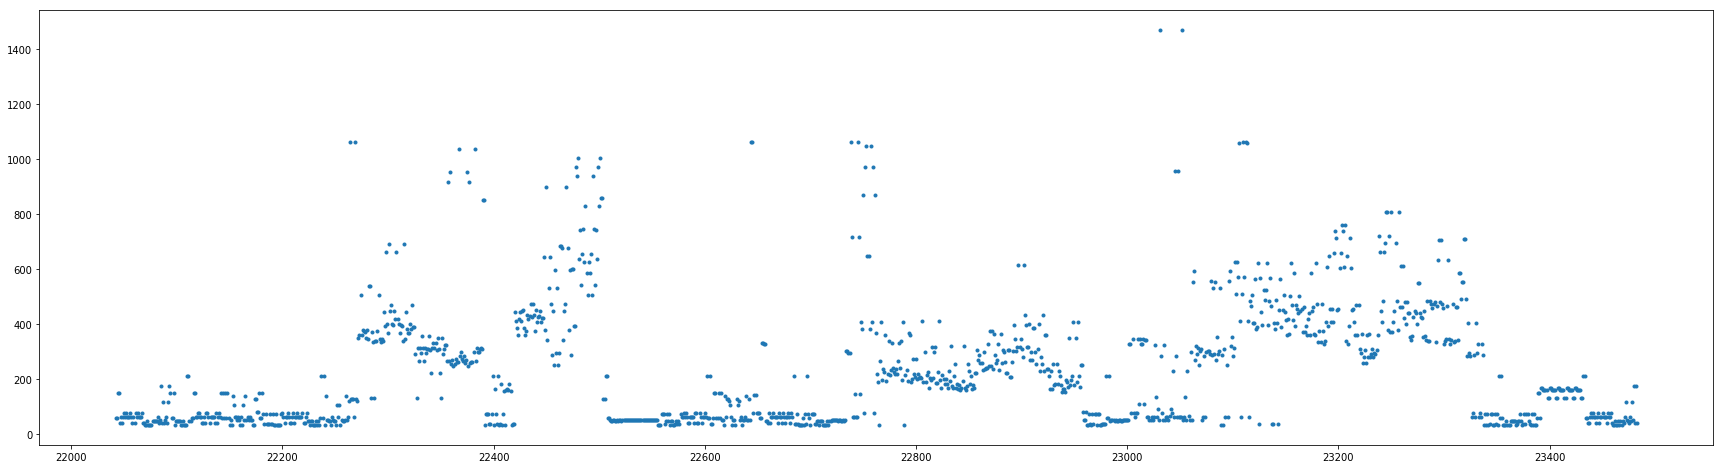

In [112]:
data_cctv.len.plot(style='.')

In [113]:
temp = raw_data_1
data_etc = temp[temp.timestamp > '2018-10-12 19:33:00']
data_etc = data_etc[data_etc.timestamp < '2018-10-12 19:56:00']
del temp

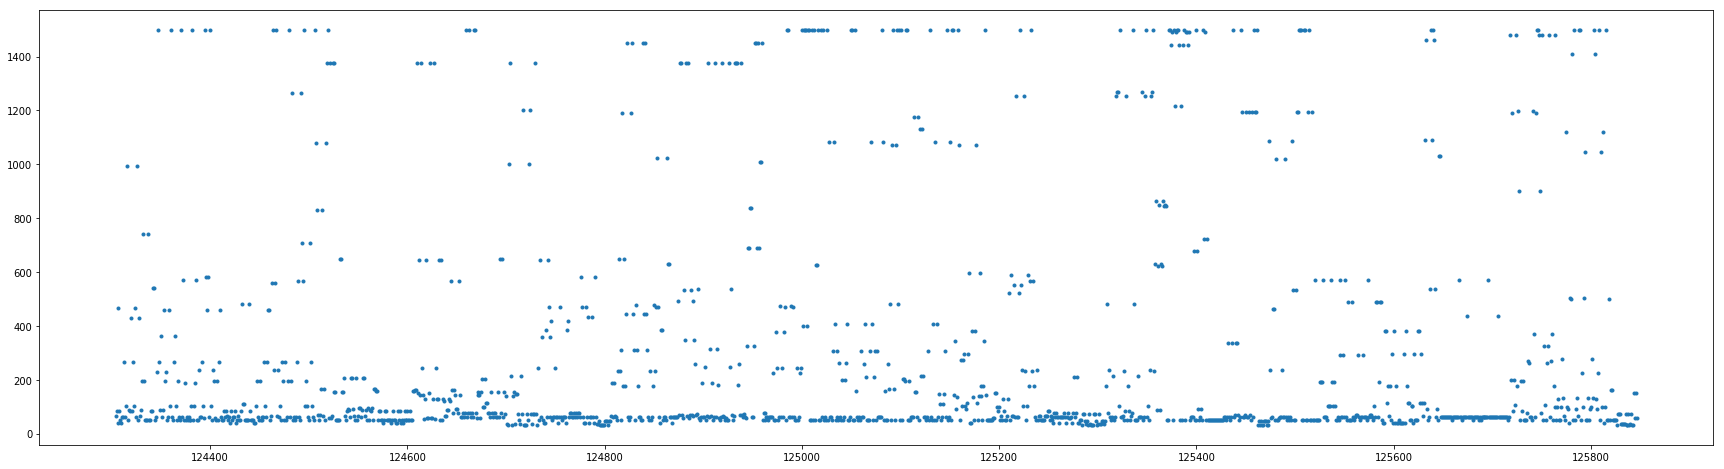

In [114]:
data_etc.len.plot(style='.')

In [124]:
temp = raw_data_2
data = temp[temp.timestamp > '2018-10-12 21:42:00']
data = data[data.timestamp < '2018-10-12 22:31:00']
del temp

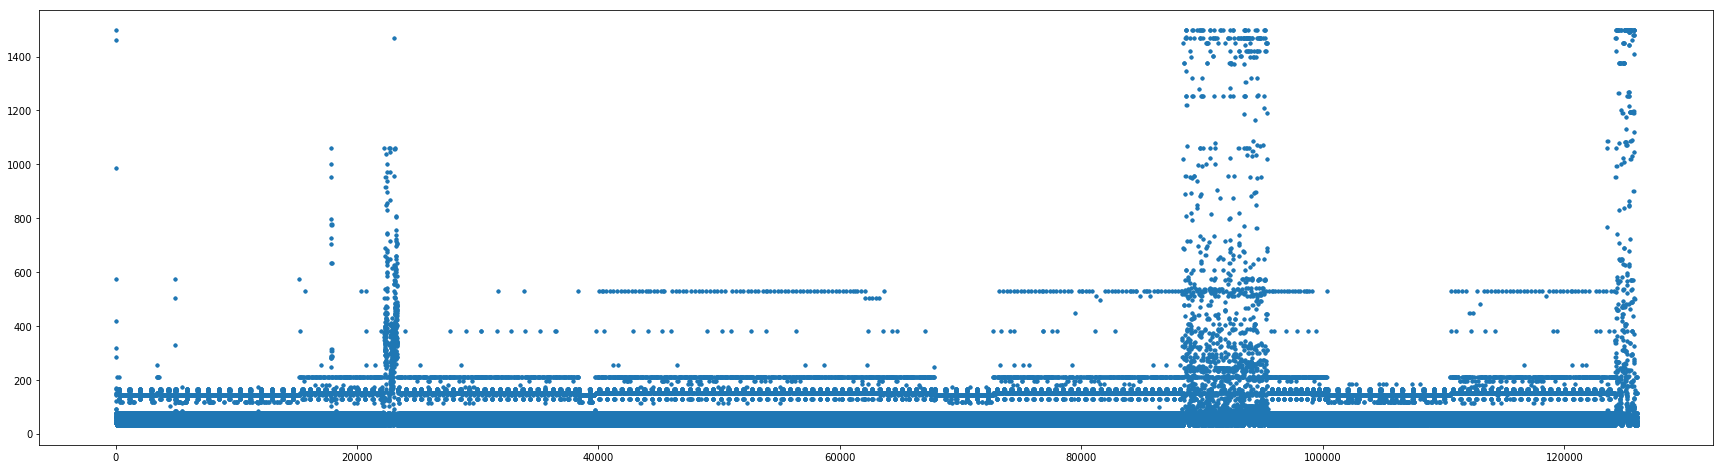

In [130]:
raw_data_1.len.plot(style='.')

In [136]:
data['var'] = data.apply(lambda v: cal_V(v, data), axis = 1)

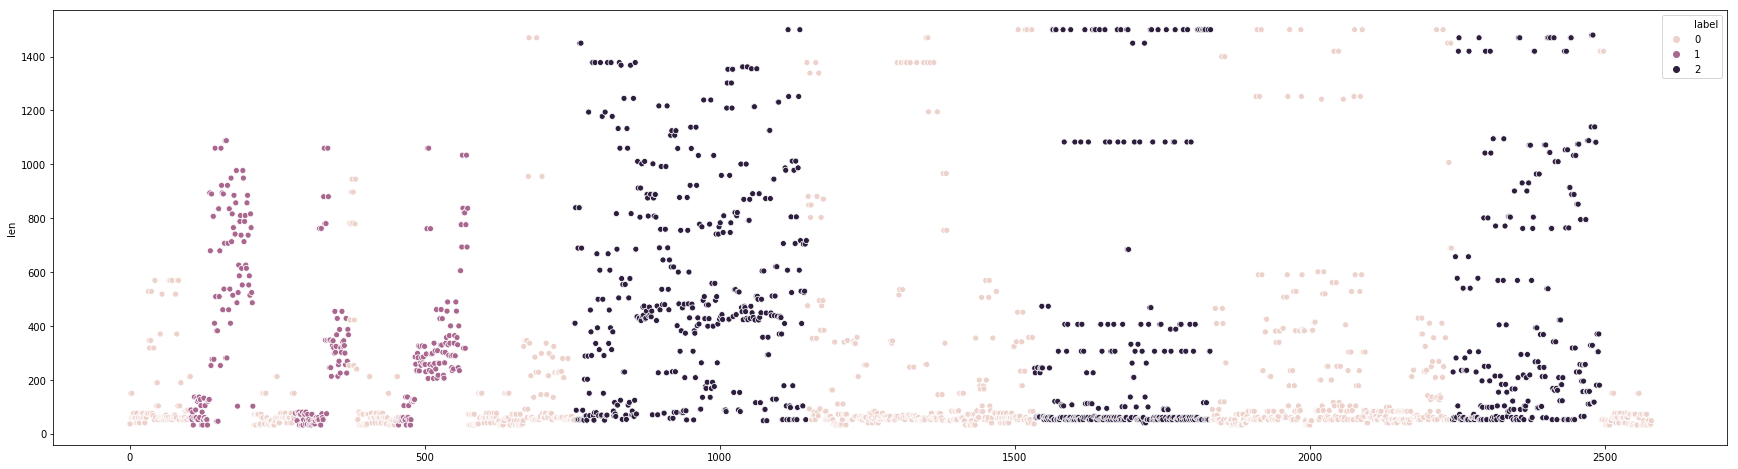

In [125]:
sns.scatterplot(x=range(len(data)), y=data.len, hue=data.label)

TypeError: float() argument must be a string or a number, not 'method'

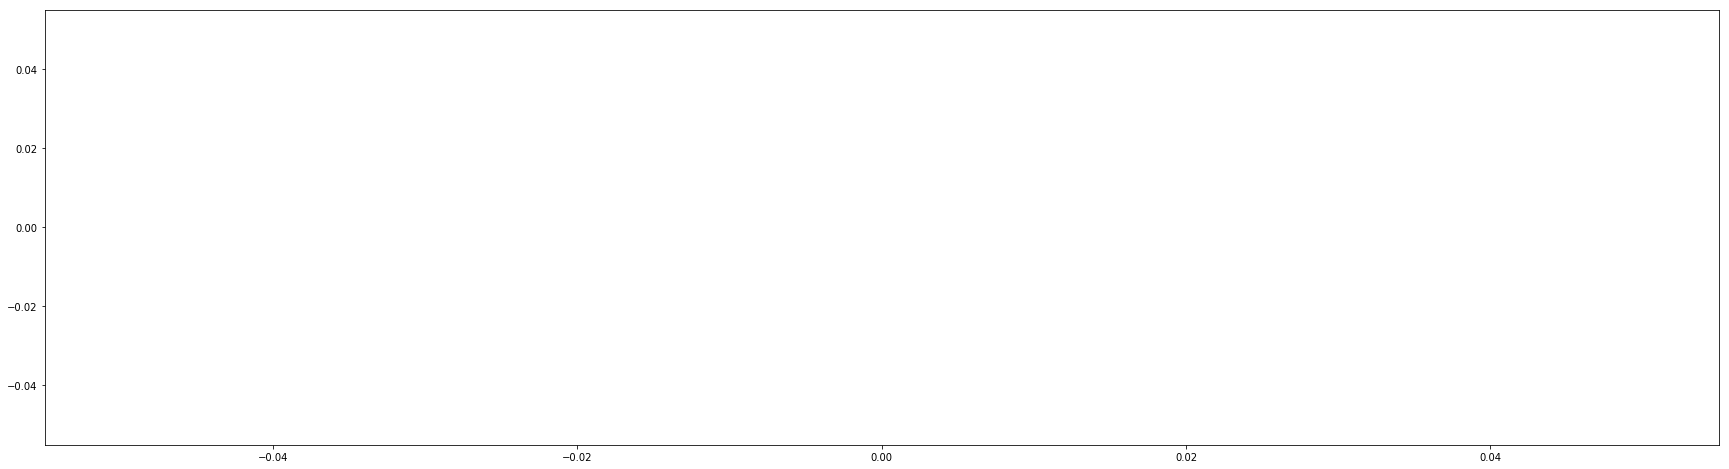

In [137]:
sns.scatterplot(x=range(len(data)), y=data.var, hue=data.label)

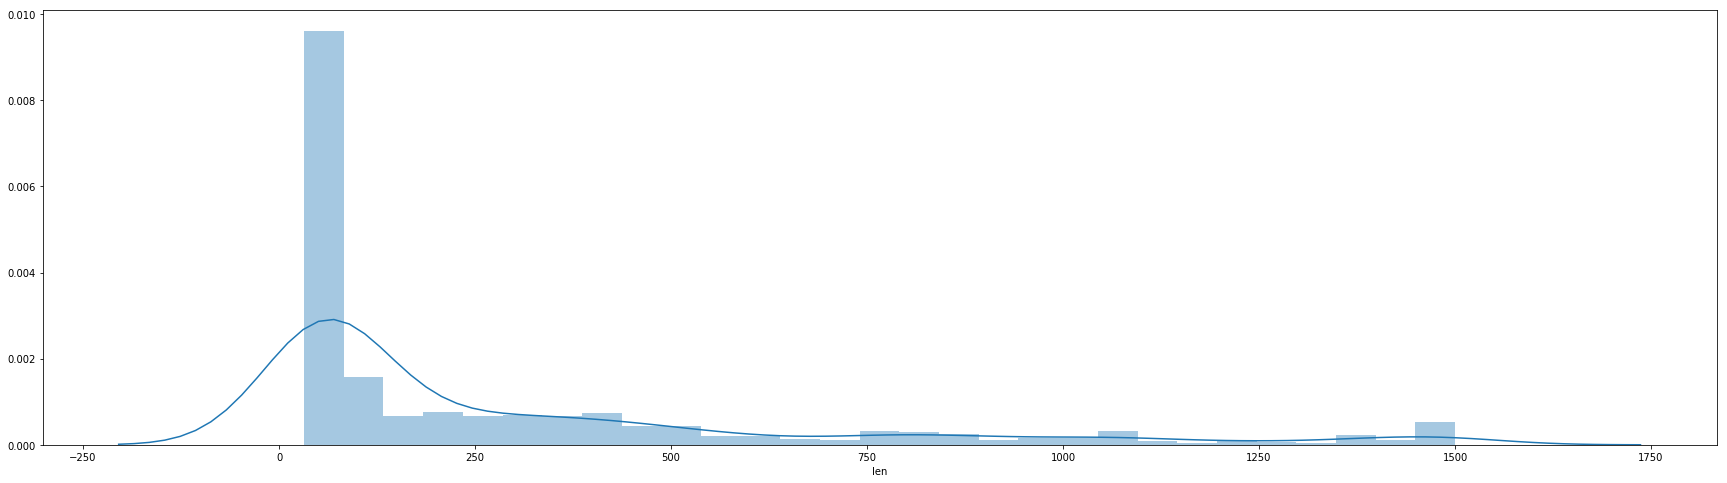

In [90]:
sns.distplot(data.len)

In [100]:
pd.crosstab(index=data.len, columns='cnt').index.values

array([  32,   36,   40,   46,   48,   50,   51,   52,   53,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   72,   73,   74,   75,   76,   78,   79,   80,   82,   83,
         84,   85,   86,   87,   88,   89,   90,   91,   92,   94,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  106,  107,  110,
        111,  112,  115,  116,  117,  118,  120,  121,  122,  124,  125,
        126,  127,  128,  132,  134,  135,  136,  141,  145,  150,  153,
        154,  156,  157,  161,  162,  166,  168,  175,  177,  178,  180,
        182,  183,  189,  191,  195,  196,  199,  202,  205,  206,  208,
        209,  212,  213,  214,  215,  217,  218,  225,  226,  227,  228,
        229,  230,  231,  232,  233,  234,  235,  236,  240,  243,  244,
        245,  246,  247,  249,  250,  253,  254,  255,  256,  257,  258,
        261,  262,  263,  267,  268,  269,  276,  279,  281,  282,  284,
        285,  288,  289,  290,  291,  293,  294,  2

In [99]:
pd.crosstab(index=data.len, columns='cnt').cnt.values

array([100,  58,  70,   2,  64,  12,   8, 352,   2,   2,  10,  50, 274,
         2,   6,   2,  46,   4,  12,   6,   8,  12,   2,  62,   2,   2,
        12,  54,   4,   2,  10,   4,  54,   2,  10,  10,   8,   4,   2,
         8,   4,   4,   2,   2,   2,   6,   2,   2,   2,   2,  26,   4,
         2,   2,   4,   2,   2,   4,   4,   2,   2,   6,   2,   2,   2,
         4,   2,   4,   2,   2,   2,   4,   8,   2,   4,  28,   2,   2,
         2,   2,   2,   2,   4,   4,   2,   2,   8,   2,   2,   2,   4,
         2,   2,   2,   6,   2,   2,   2,   8,   4,  16,   2,   2,   2,
         2,   2,   2,   6,   4,   2,   6,   4,   4,   2,   2,   8,   6,
         2,   4,   2,   2,   6,   2,   2,   2,   6,   4,   2,   4,   2,
         6,   2,   2,   2,   8,   2,   2,   2,   2,   2,   4,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   4,   2,   4,   4,   4,
        20,   2,   2,   2,   4,   2,  10,   2,   2,   2,   2,   2,   2,
         4,  10,   2,   2,   6,   2,   2,   2,   8,   2,   2,   

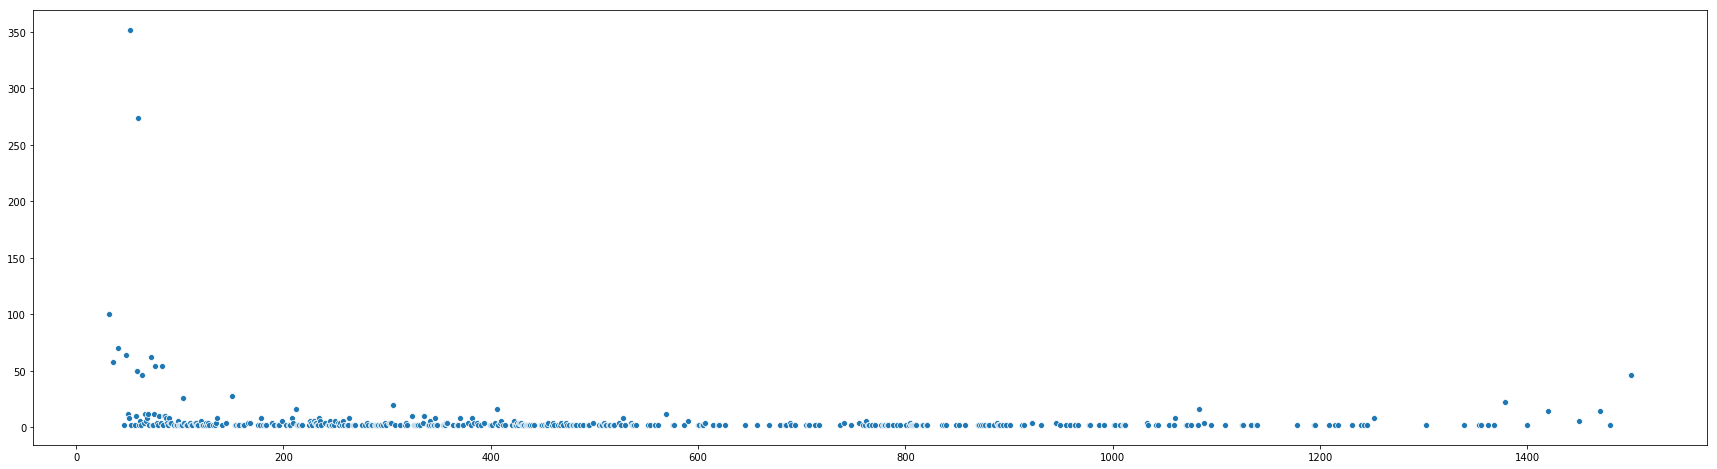

In [104]:
sns.scatterplot(x=pd.crosstab(index=data.len, columns='cnt').index.values, y=pd.crosstab(index=data.len, columns='cnt').cnt.values)

## cctv 영상 데이터

In [60]:
data = raw_data_1

In [61]:
data_cctv = data[data.timestamp >  '2018-10-09 13:30:00']

In [62]:
data_cctv = data_cctv[data_cctv.timestamp < '2018-10-09 14:00:00']

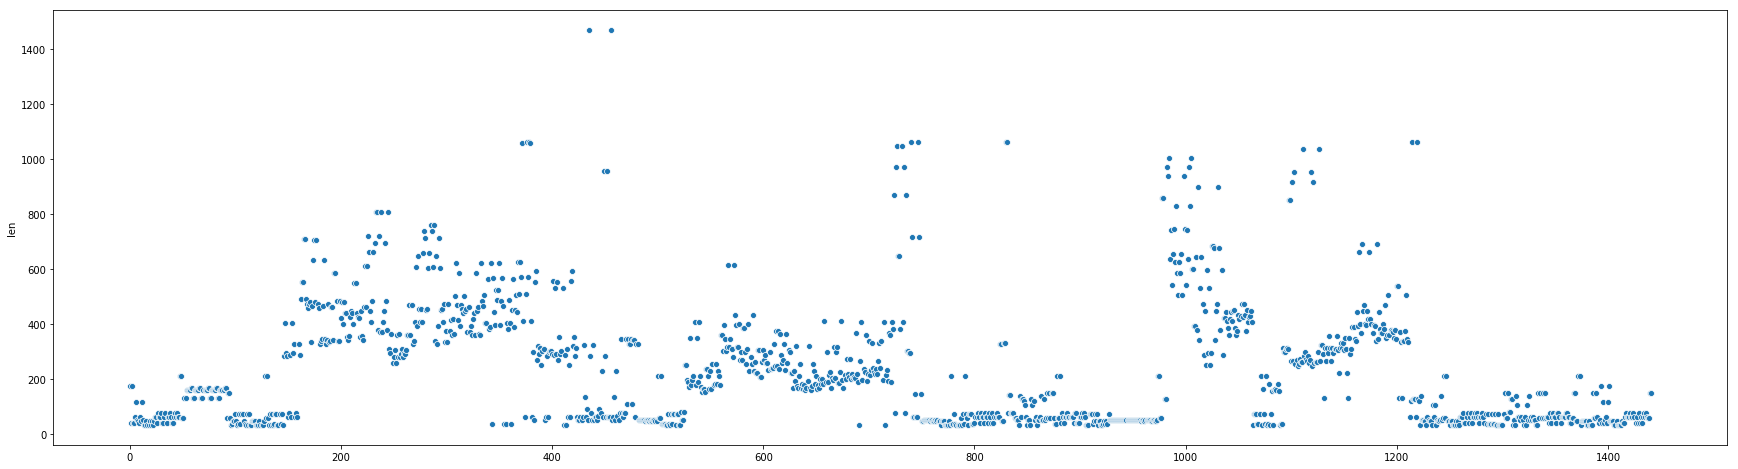

In [63]:
sns.scatterplot(x=range(len(data_cctv)), y=data_cctv.len)

## 유튜브, 아프리카, 웹서핑 데이터

In [55]:
data_etc = data[data.timestamp > '2018-10-12 19:33:00']

In [56]:
data_etc = data_etc[data_etc.timestamp < '2018-10-12 19:56:00']

## 파생변수

In [57]:
data_cctv['length_mean_rate'] = data_cctv.apply(lambda v: cal_LMR(v, data_cctv), axis = 1)
data_cctv['length_cnt_rate'] = data_cctv.apply(lambda v: cal_LCR(v, data_cctv), axis = 1)

In [58]:
data_etc['length_mean_rate'] = data_etc.apply(lambda v: cal_LMR(v, data_etc), axis = 1)
data_etc['length_cnt_rate'] = data_etc.apply(lambda v: cal_LCR(v, data_etc), axis = 1)

## export2 데이터

In [164]:
data = raw_data_2

In [165]:
data = data[data.timestamp > '2018-10-12 21:42:00']
data = data[data.timestamp < '2018-10-12 22:31:00']

In [166]:
data['length_mean_rate'] = data.apply(lambda v: cal_LMR(v, data), axis = 1)
data['length_cnt_rate'] = data.apply(lambda v: cal_LCR(v, data), axis = 1)

In [219]:
data['length_freq'] = data.apply(lambda v: cal_C(v, data), axis = 1)

## 플롯

In [41]:
temp = data[['timestamp','len']]

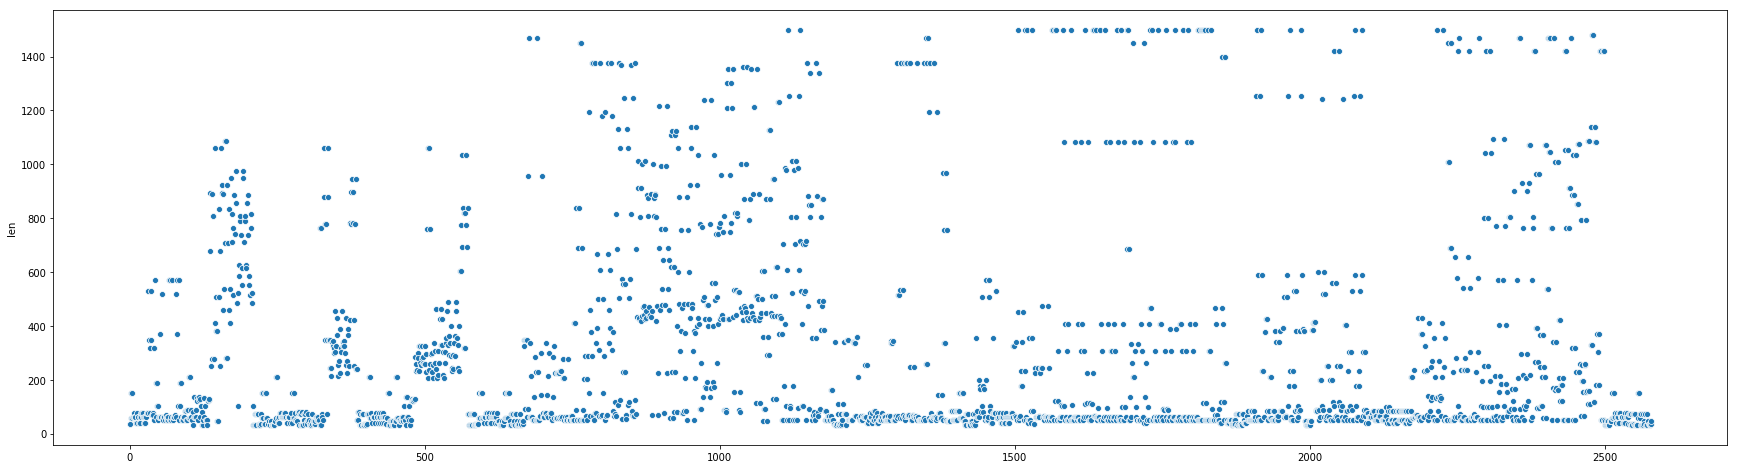

In [53]:
sns.scatterplot(x=range(len(data)), y=data.len)

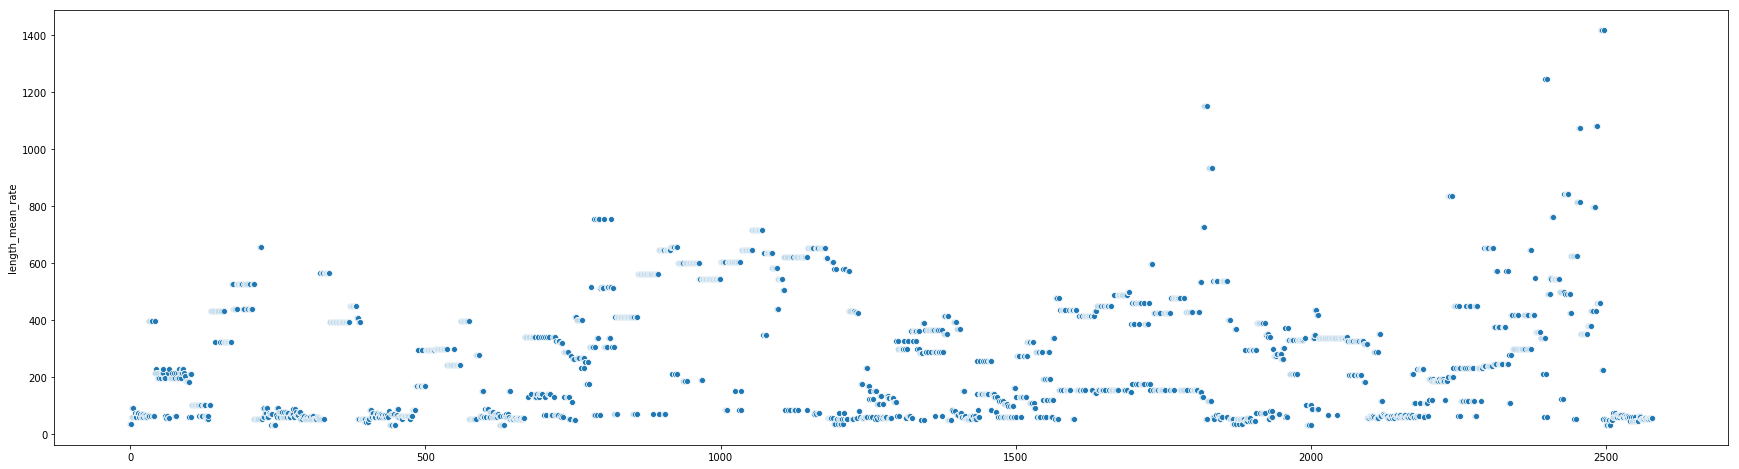

In [23]:
sns.scatterplot(x=range(len(data)), y=data.length_mean_rate)

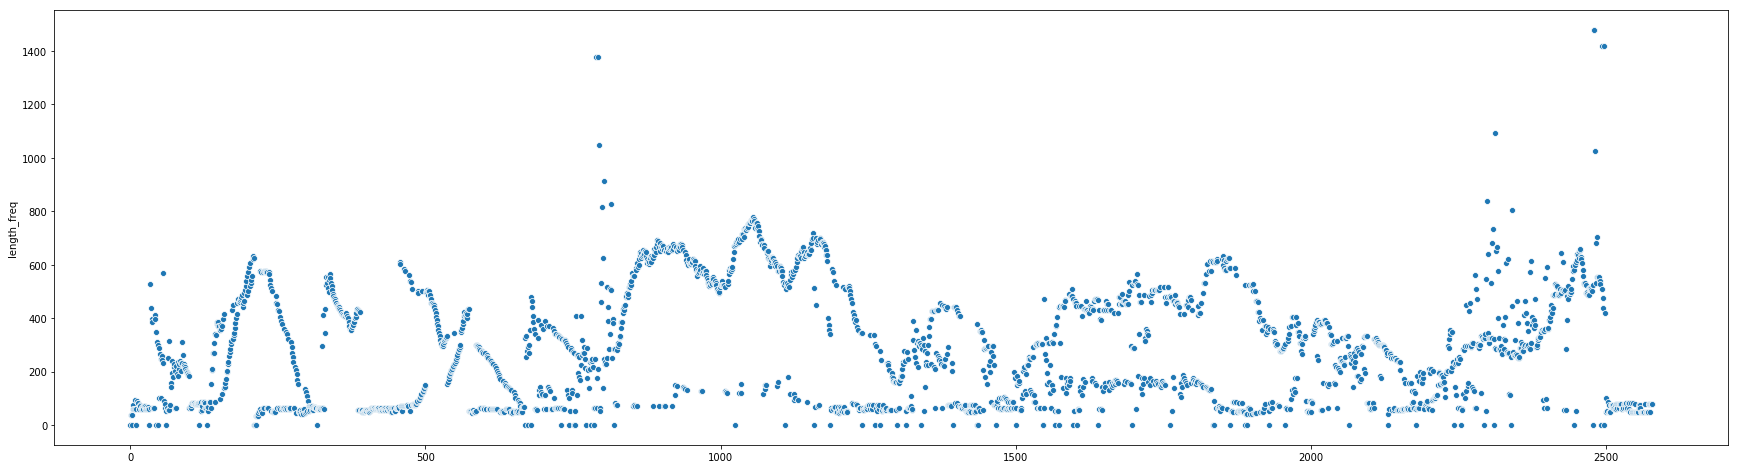

In [220]:
sns.scatterplot(x=range(len(data)), y=data.length_freq)

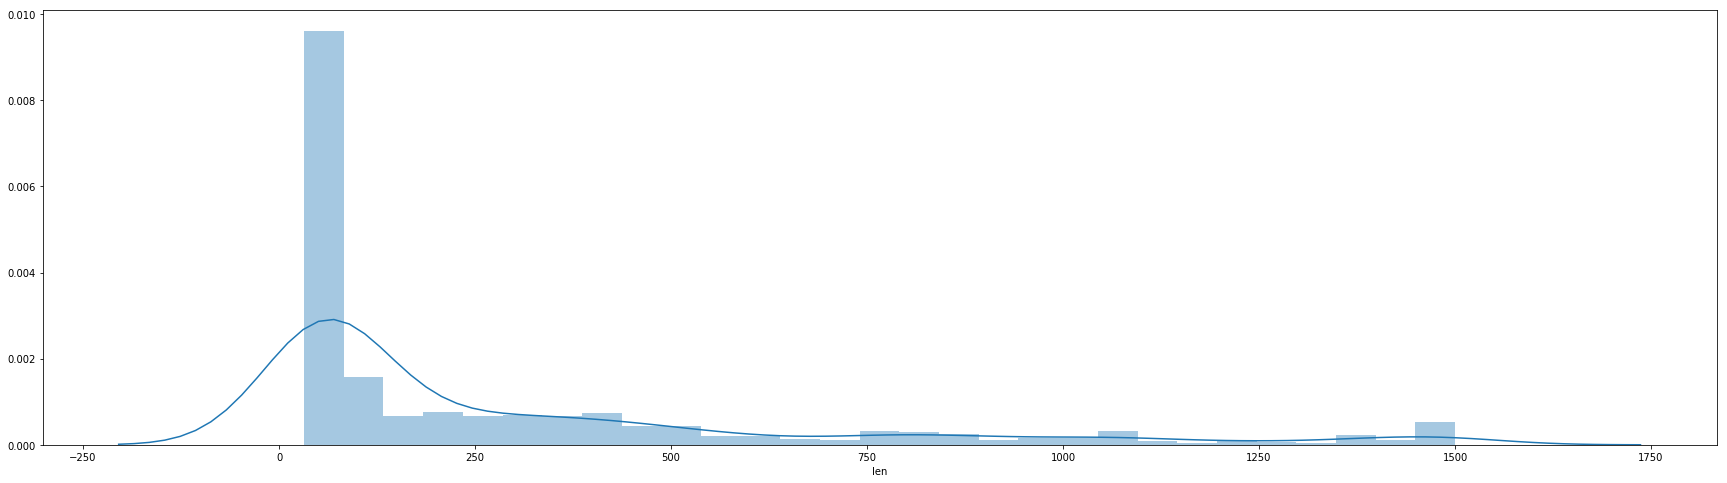

In [192]:
sns.distplot(data.len)

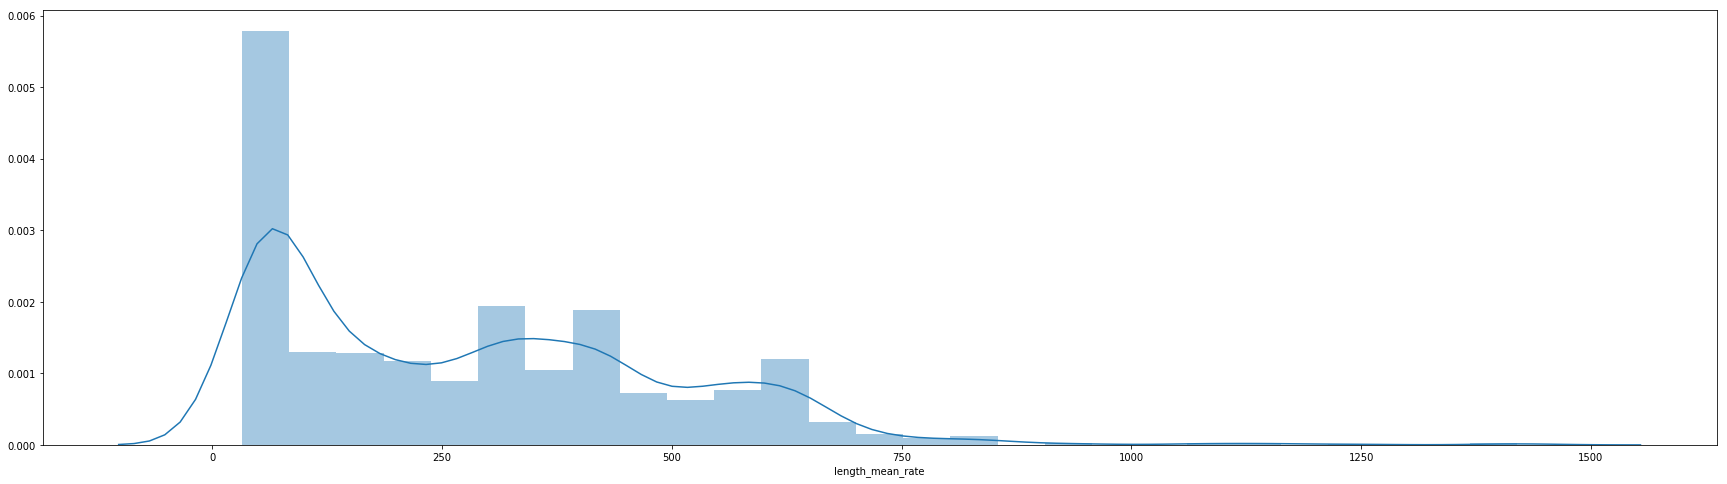

In [194]:
sns.distplot(data.length_mean_rate)

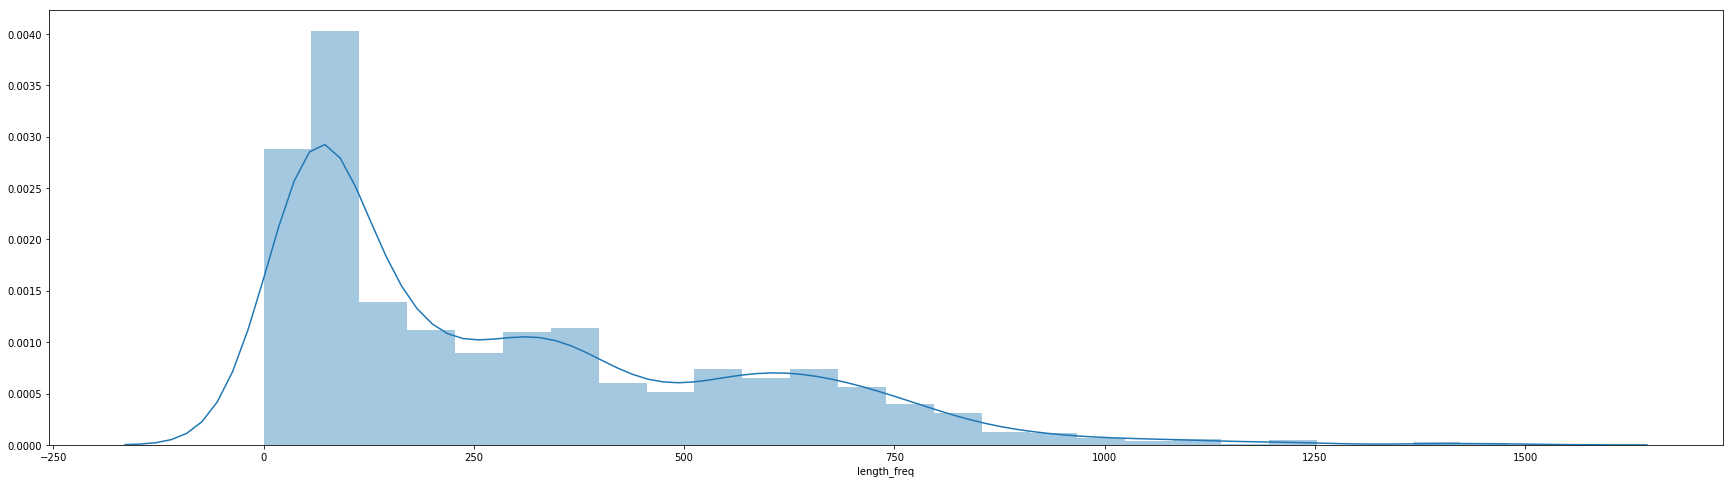

In [195]:
sns.distplot(data.length_freq)

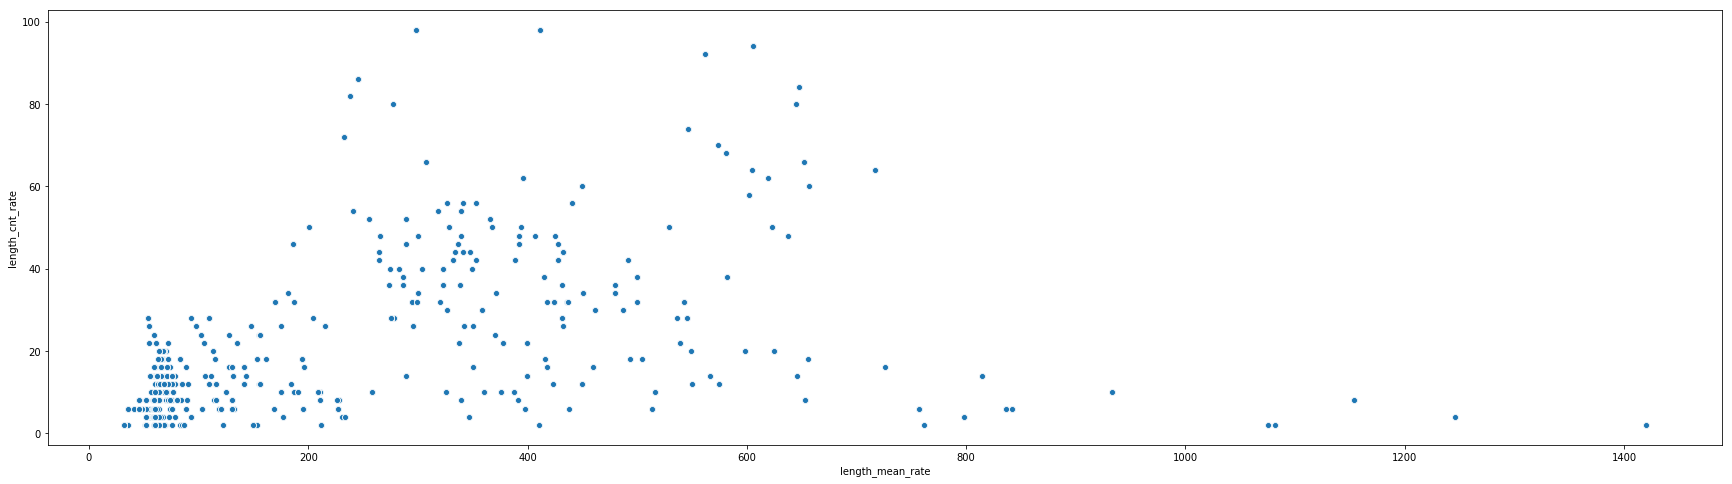

In [196]:
sns.scatterplot(x=data.length_mean_rate, y=data.length_cnt_rate)

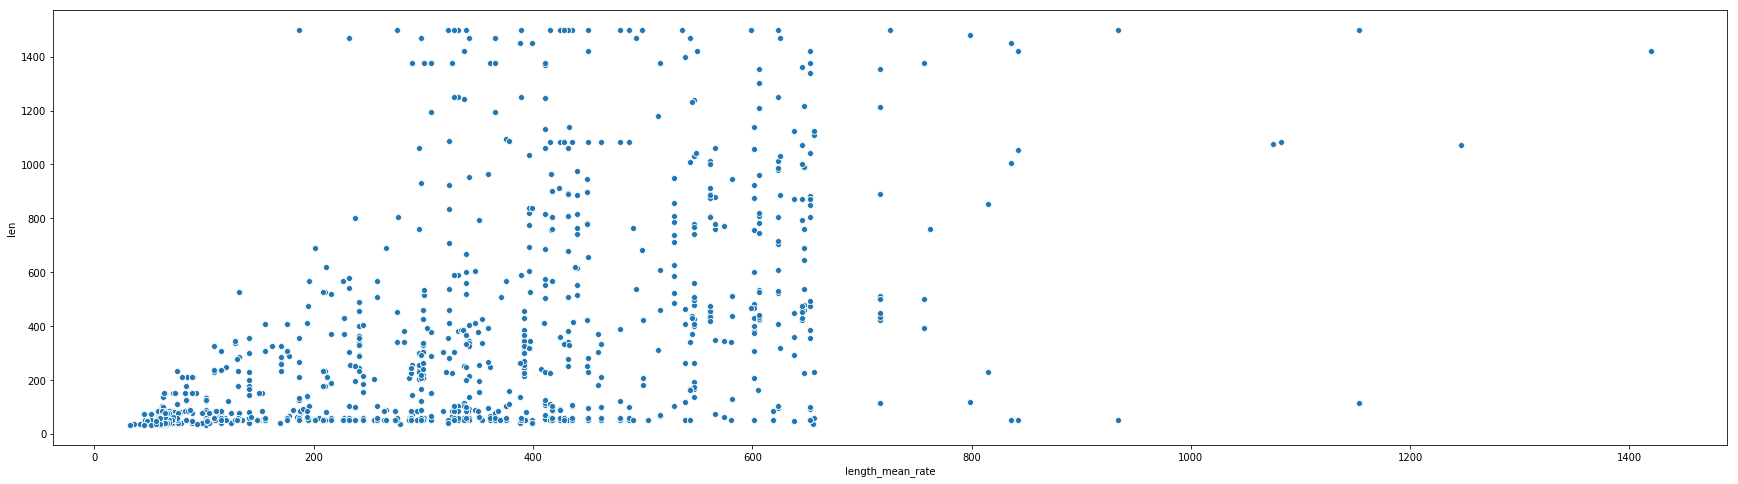

In [221]:
sns.scatterplot(x=data.length_mean_rate, y=data.len)

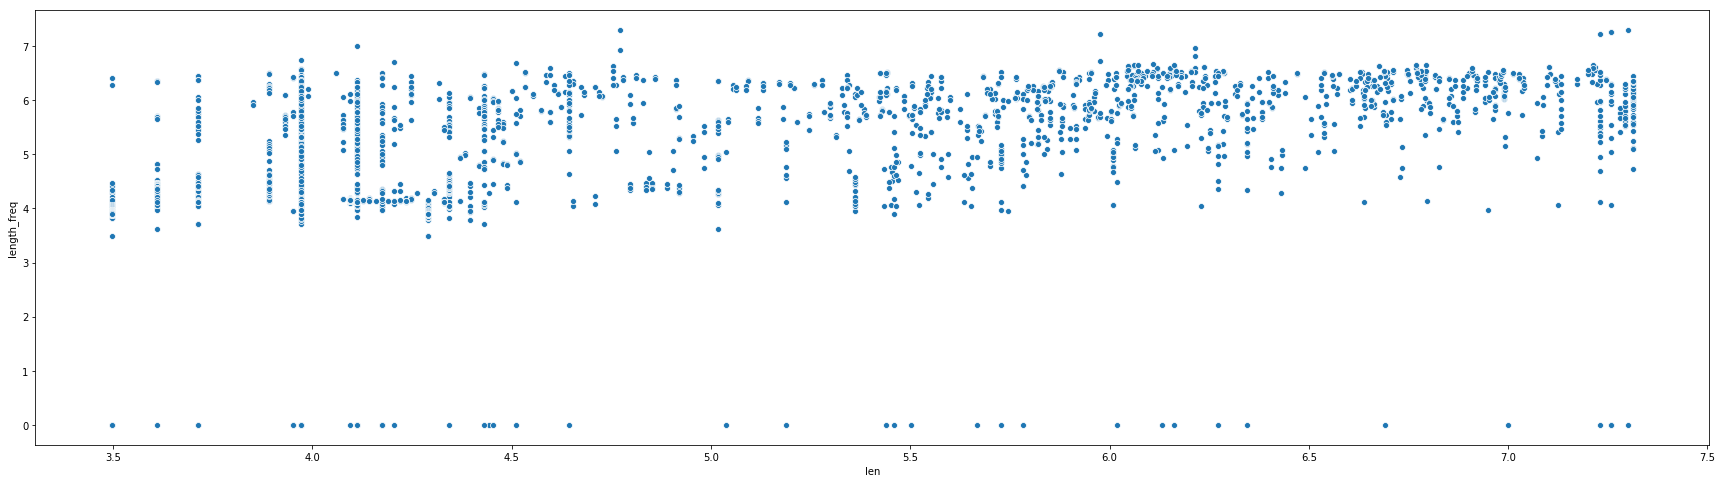

In [227]:
sns.scatterplot(x=np.log(data.len + 1), y=np.log(data.length_freq + 1))

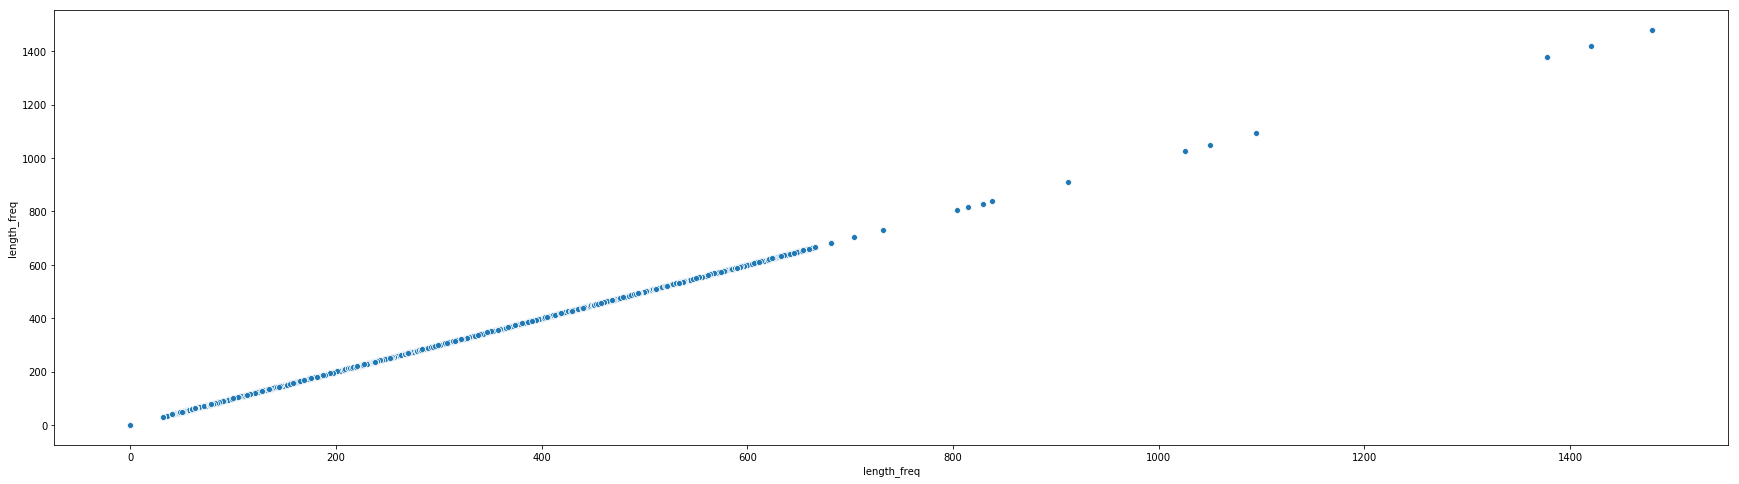

In [216]:
sns.scatterplot(x=data.length_freq, y=data.length_freq)

In [339]:
raw_data[['srcPort', 'dstPort', 'proto']] = raw_data[['srcPort', 'dstPort', 'proto']].astype(object)

In [341]:
raw_data.describe(include='O')

,dstIp,srcPort,dstPort,srcIp,proto,timestamp
count,7798,7798,7798,7798,7798,7798
unique,64,454,455,65,3,769
top,10.0.0.18,443,32100,10.0.0.95,17,2018-10-14 16:26:01
freq,2068,1552,1462,2402,4024,56
